### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
from chart_studio import plotly
import plotly.figure_factory as ff

In [5]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [6]:
gov_arch_csv = '../data/communities_data_prepped.csv'

In [7]:
gov_df = pd.read_csv(gov_arch_csv)

In [8]:
gov_df.head()

Name                                       Institutions  \
0  !Kung San (Ju/hoansi)                         Hxaro,Headman,Group,Kgotla   
1  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
2                   Akha  Council of Elders,Village Founder-Leader (dzom...   
3                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4            Arab nomads                 shaykh or sayyid,shura or mashwara   

                                           Mechanism  \
0  Leader (first among equals),Deliberation,Corpo...   
1  Election,Council (central) ,Assembly (central)...   
2  Leader (first among equals),Gerontocracy,Conse...   
3  Election,Magistrate/official,Heredity,Constitu...   
4  Consensus,Oath,Handshake,Leader (first among e...   

                                Culture/Values/Norms  \
0  Reciprocity,Cooperation,Egalitarianism,Generos...   
1                            Shared identity/Kinship   
2  Shared identity/Kinship,Ritual,Supernatural,Wr...   
3  Written rules,Cooperation,Obedience to authori...   
4                                                NaN   

                                               Notes  \
0  Hxaro - System of mutual reciprocity and socia...   
1  There are many Celtic oppida throughout northe...   
2                                                NaN   
3  Camera, M, p. 29 ("La sua popolazione che nel ...   
4  Nomadic Bedouin society governed by rulers sel...   

                                           Time span  Time span: Start  \
0      20th century - Present\n(dates are arbitrary)              1900   
1                                 2nd-1st century BC              -200   
2                             20th century - Present              1900   
3                                4th-12th century AD               300   
4  1st-7th century AD\n(start date is arbitrary, ...                 0   

   Time span: End        Geography                 Size  \
0            2023     Africa South       1,001 - 10,000   
1               0     Europe North  100,001 - 1,000,000   
2            2023  Asia Southeast      10,001 - 100,000   
3            1200      Europe West     10,001 - 100,000   
4             700      Middle East              Unknown   

                                              Source  \
0  Polly Wiessner (1982), Risk, reciprocity and s...   
1  Collis, “Celtic” Oppida, in Hansen, A Comparat...   
2  Main: \nKammerer, Cornelia Ann (1985/86), Gate...   
3  Camera, M. Istoria della città e costiera di A...   
4  Stasavage, David (2020), The Decline and Rise ...   

                                           Metanotes  \
0  Standing in for small-scale egalitarian bands....   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Heterogeneity   \
0                                                NaN   
1                                                NaN   
2  Informal inclusion,Gender groups,Informal powe...   
3                                                NaN   
4                                                NaN   

                                         FC comments expert check  \
0                                    Edited April 23          NaN   
1                                    Edited March 23          NaN   
2                                      Edited May 23          NaN   
3      Edited March 23 (could use more info on CGIs)          NaN   
4  Edited Feb 23 (could use additional sources fo...          NaN   

   access_mechanisms_include_open_political_unit  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0

# Courts Analysis 

In [15]:
col_list = list(gov_df.columns.values)
col_list

['Name',
 'Institutions',
 'Mechanism',
 'Culture/Values/Norms',
 'Notes',
 'Time span',
 'Time span: Start',
 'Time span: End',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'access_mechanisms_include_open_political_unit',
 'enforcement_mechanisms_include_suspension_expulsion_ostracism_proscription',
 'enforcement_mechanisms_include_reputational_risk',
 'decision_making_mechanisms_include_consensus',
 'access_mechanisms_include_life_appointment',
 'decision_making_mechanisms_include_petition',
 'access_mechanisms_include_heredity',
 'decision_making_mechanisms_include_president_consul_chief_executive',
 'access_mechanisms_include_property_requirement',
 'enforcement_mechanisms_include_destruction_of_property',
 'enforcement_mechanisms_include_paying_damages_compensation',
 'decision_making_mechanisms_include_supermajority',
 'access_mechanisms_include_patronage_for_office',
 'enforcement_mechanisms_include_exit',
 'access_mechanis

In [22]:
court_col = ['enforcement_mechanisms_include_tribunal_court_']

In [55]:
courts = 'enforcement_mechanisms_include_tribunal_court_'

In [29]:
courts_df = gov_df[(gov_df['enforcement_mechanisms_include_tribunal_court_'] == 1)]

In [30]:
no_courts_df = gov_df[(gov_df['enforcement_mechanisms_include_tribunal_court_'] == 0)]

In [31]:
courts_df.head()

Name  \
0        !Kung San (Ju/hoansi)   
5                        Assur   
6    Athens (Classical Period)   
9                     Carthage   
14  Communes (Medieval Europe)   

                                         Institutions  \
0                          Hxaro,Headman,Group,Kgotla   
5                   King,Alum,Limmum,Scribe,City hall   
6   Council of Five Hundred (Boule),Areopagus,Ekkl...   
9   Rab kohanim,Council of Elders,Tribunal of 104,...   
14                                      King,Assembly   

                                            Mechanism  \
0   Leader (first among equals),Deliberation,Corpo...   
5   President/Consul/Chief Executive,Assembly (cen...   
6   Election,Plurality voting,Temporary position o...   
9   Autocratic Leader/Chief (bound),Blood relation...   
14  Autocratic Leader/Chief (bound),Consultation,A...   

                                 Culture/Values/Norms  \
0   Reciprocity,Cooperation,Egalitarianism,Generos...   
5               Shared identity/Kinship,Written rules   
6   Discrimination,Egalitarianism,Shared identity/...   
9                                                 NaN   
14                                                NaN   

                                                Notes  \
0   Hxaro - System of mutual reciprocity and socia...   
5   Independent city-state. Constitutional monarch...   
6   'Cleisthenes reorganized Athens into 139 demes...   
9   'While it is true that Carthage had a range of...   
14  Municipal self-governance under a monarch resp...   

                                        Time span  Time span: Start  \
0   20th century - Present\n(dates are arbitrary)              1900   
5                 19th century BC\n(1920-1800 BC)             -1920   
6                 5th-4th century BC (508-322 BC)              -508   
9                              4th-2nd century BC              -400   
14                           10th-13th century AD               900   

    Time span: End                   Geography                 Size  \
0             2023                Africa South       1,001 - 10,000   
5            -1800  Europe Southeast, Anatolia       1,001 - 10,000   
6             -322                Europe South  100,001 - 1,000,000   
9             -100               Africa North   100,001 - 1,000,000   
14            1200                 Europe West     10,001 - 100,000   

                                               Source  \
0   Polly Wiessner (1982), Risk, reciprocity and s...   
5   Larsen, M. T. The Old Assyrian City-State in H...   
6   Stasavage, David (2020), The Decline and Rise ...   
9   Docter, Roald (2015), Punic Carthage, in Carth...   
14  Reynolds, Kingdoms and communities in Western ...   

                                            Metanotes Heterogeneity   \
0   Standing in for small-scale egalitarian bands....            NaN   
5                                                 NaN            NaN   
6                                                 NaN            NaN   
9                                                 NaN            NaN   
14                                                NaN            NaN   

                                          FC comments     expert check  \
0                                     Edited April 23              NaN   
5                                       Edited Mar 23  Giacomo CHECKED   
6                                       Edited Mar 23              NaN   
9   Edited Feb 23 (Additional sources can be used ...              NaN   
14    Edited Jun 23 (Could use more specific sources)              NaN   

    access_mechanisms_include_open_political_unit  \
0                                               0   
5                                               0   
6                                               0   
9                                               0   
14                                              0   

    enforcement_mechanisms_include_suspension_expulsion

In [32]:
no_courts_df.head()

Name                                       Institutions  \
1  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
2                   Akha  Council of Elders,Village Founder-Leader (dzom...   
3                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
4            Arab nomads                 shaykh or sayyid,shura or mashwara   
7      Aztec City-States                    Tlatoani,Council of high nobles   

                                           Mechanism  \
1  Election,Council (central) ,Assembly (central)...   
2  Leader (first among equals),Gerontocracy,Conse...   
3  Election,Magistrate/official,Heredity,Constitu...   
4  Consensus,Oath,Handshake,Leader (first among e...   
7  Autocratic Leader/Chief (bound),Heredity,Merit...   

                                Culture/Values/Norms  \
1                            Shared identity/Kinship   
2  Shared identity/Kinship,Ritual,Supernatural,Wr...   
3  Written rules,Cooperation,Obedience to authori...   
4                                                NaN   
7  Strict hierarchy/caste system,Obedience to aut...   

                                               Notes  \
1  There are many Celtic oppida throughout northe...   
2                                                NaN   
3  Camera, M, p. 29 ("La sua popolazione che nel ...   
4  Nomadic Bedouin society governed by rulers sel...   
7  BOUNDARY CASE: there is a council but degree  ...   

                                           Time span  Time span: Start  \
1                                 2nd-1st century BC              -200   
2                             20th century - Present              1900   
3                                4th-12th century AD               300   
4  1st-7th century AD\n(start date is arbitrary, ...                 0   
7                             12th - 16th century AD              1100   

   Time span: End                Geography                 Size  \
1               0             Europe North  100,001 - 1,000,000   
2            2023          Asia Southeast      10,001 - 100,000   
3            1200              Europe West     10,001 - 100,000   
4             700              Middle East              Unknown   
7            1600  Central America, Mexico  100,001 - 1,000,000   

                                              Source Metanotes  \
1  Collis, “Celtic” Oppida, in Hansen, A Comparat...       NaN   
2  Main: \nKammerer, Cornelia Ann (1985/86), Gate...       NaN   
3  Camera, M. Istoria della città e costiera di A...       NaN   
4  Stasavage, David (2020), The Decline and Rise ...       NaN   
7  Michael E. Smith, Aztec City-States, in Hansen...       NaN   

                                      Heterogeneity   \
1                                                NaN   
2  Informal inclusion,Gender groups,Informal powe...   
3                                                NaN   
4                                                NaN   
7                                                NaN   

                                         FC comments expert check  \
1                                    Edited March 23          NaN   
2                                      Edited May 23          NaN   
3      Edited March 23 (could use more info on CGIs)          NaN   
4  Edited Feb 23 (could use additional sources fo...          NaN   
7                                      Edited May 23          NaN   

   access_mechanisms_include_open_political_unit  \
1                                              0   
2                                              0   
3                                              0   
4                                              0   
7                                              0   

   enforcement_mechanisms_include_suspension_expulsion_ostracism_proscription  \
1                                                  0                            
2                                                  0          

In [33]:
courts_df.describe()

Time span: Start  Time span: End  \
count         14.000000       14.000000   
mean          87.714286      564.357143   
std         1448.853309     1349.308233   
min        -2700.000000    -1800.000000   
25%         -501.000000     -266.500000   
50%          650.000000     1150.000000   
75%          982.500000     1740.000000   
max         1900.000000     2023.000000   

       access_mechanisms_include_open_political_unit  \
count                                      14.000000   
mean                                        0.071429   
std                                         0.267261   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       enforcement_mechanisms_include_suspension_expulsion_ostracism_proscription  \
count                                          14.000000                            
mean                                            0.214286                            
std                                             0.425815                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.000000                            
75%                                             0.000000                            
max                                             1.000000                            

       enforcement_mechanisms_include_reputational_risk  \
count                                         14.000000   
mean                                           0.071429   
std                                            0.267261   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       decision_making_mechanisms_include_consensus  \
count                                     14.000000   
mean                                       0.214286   
std                                        0.425815   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                        1.000000   

       access_mechanisms_include_life_appointment  \
count                                   14.000000   
mean                                     0.071429   
std                                      0.267261   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       decision_making_mechanisms_include_petition  \
count                                    14.000000   
mean                                      0.071429   
std                                       0.267261   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       access_mechanisms_include_heredity  \
count                           14.000000   
mean                             0.214286   
std                              0.425815   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.00000

In [34]:
no_courts_df.describe()

Time span: Start  Time span: End  \
count         52.000000       52.000000   
mean         740.769231     1086.307692   
std         1340.574001     1225.779936   
min        -4100.000000    -3300.000000   
25%          -50.000000      525.000000   
50%         1200.000000     1600.000000   
75%         1700.000000     1900.000000   
max         1900.000000     2023.000000   

       access_mechanisms_include_open_political_unit  \
count                                      52.000000   
mean                                        0.038462   
std                                         0.194184   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       enforcement_mechanisms_include_suspension_expulsion_ostracism_proscription  \
count                                          52.000000                            
mean                                            0.115385                            
std                                             0.322603                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.000000                            
75%                                             0.000000                            
max                                             1.000000                            

       enforcement_mechanisms_include_reputational_risk  \
count                                         52.000000   
mean                                           0.076923   
std                                            0.269069   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       decision_making_mechanisms_include_consensus  \
count                                     52.000000   
mean                                       0.269231   
std                                        0.447888   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        1.000000   
max                                        1.000000   

       access_mechanisms_include_life_appointment  \
count                                   52.000000   
mean                                     0.019231   
std                                      0.138675   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       decision_making_mechanisms_include_petition  \
count                                         52.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       access_mechanisms_include_heredity  \
count                           52.000000   
mean                             0.384615   
std                              0.491251   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              1.00000

In [37]:
gov_df[court_col].value_counts()

enforcement_mechanisms_include_tribunal_court_
0                                                 52
1                                                 14
dtype: int64

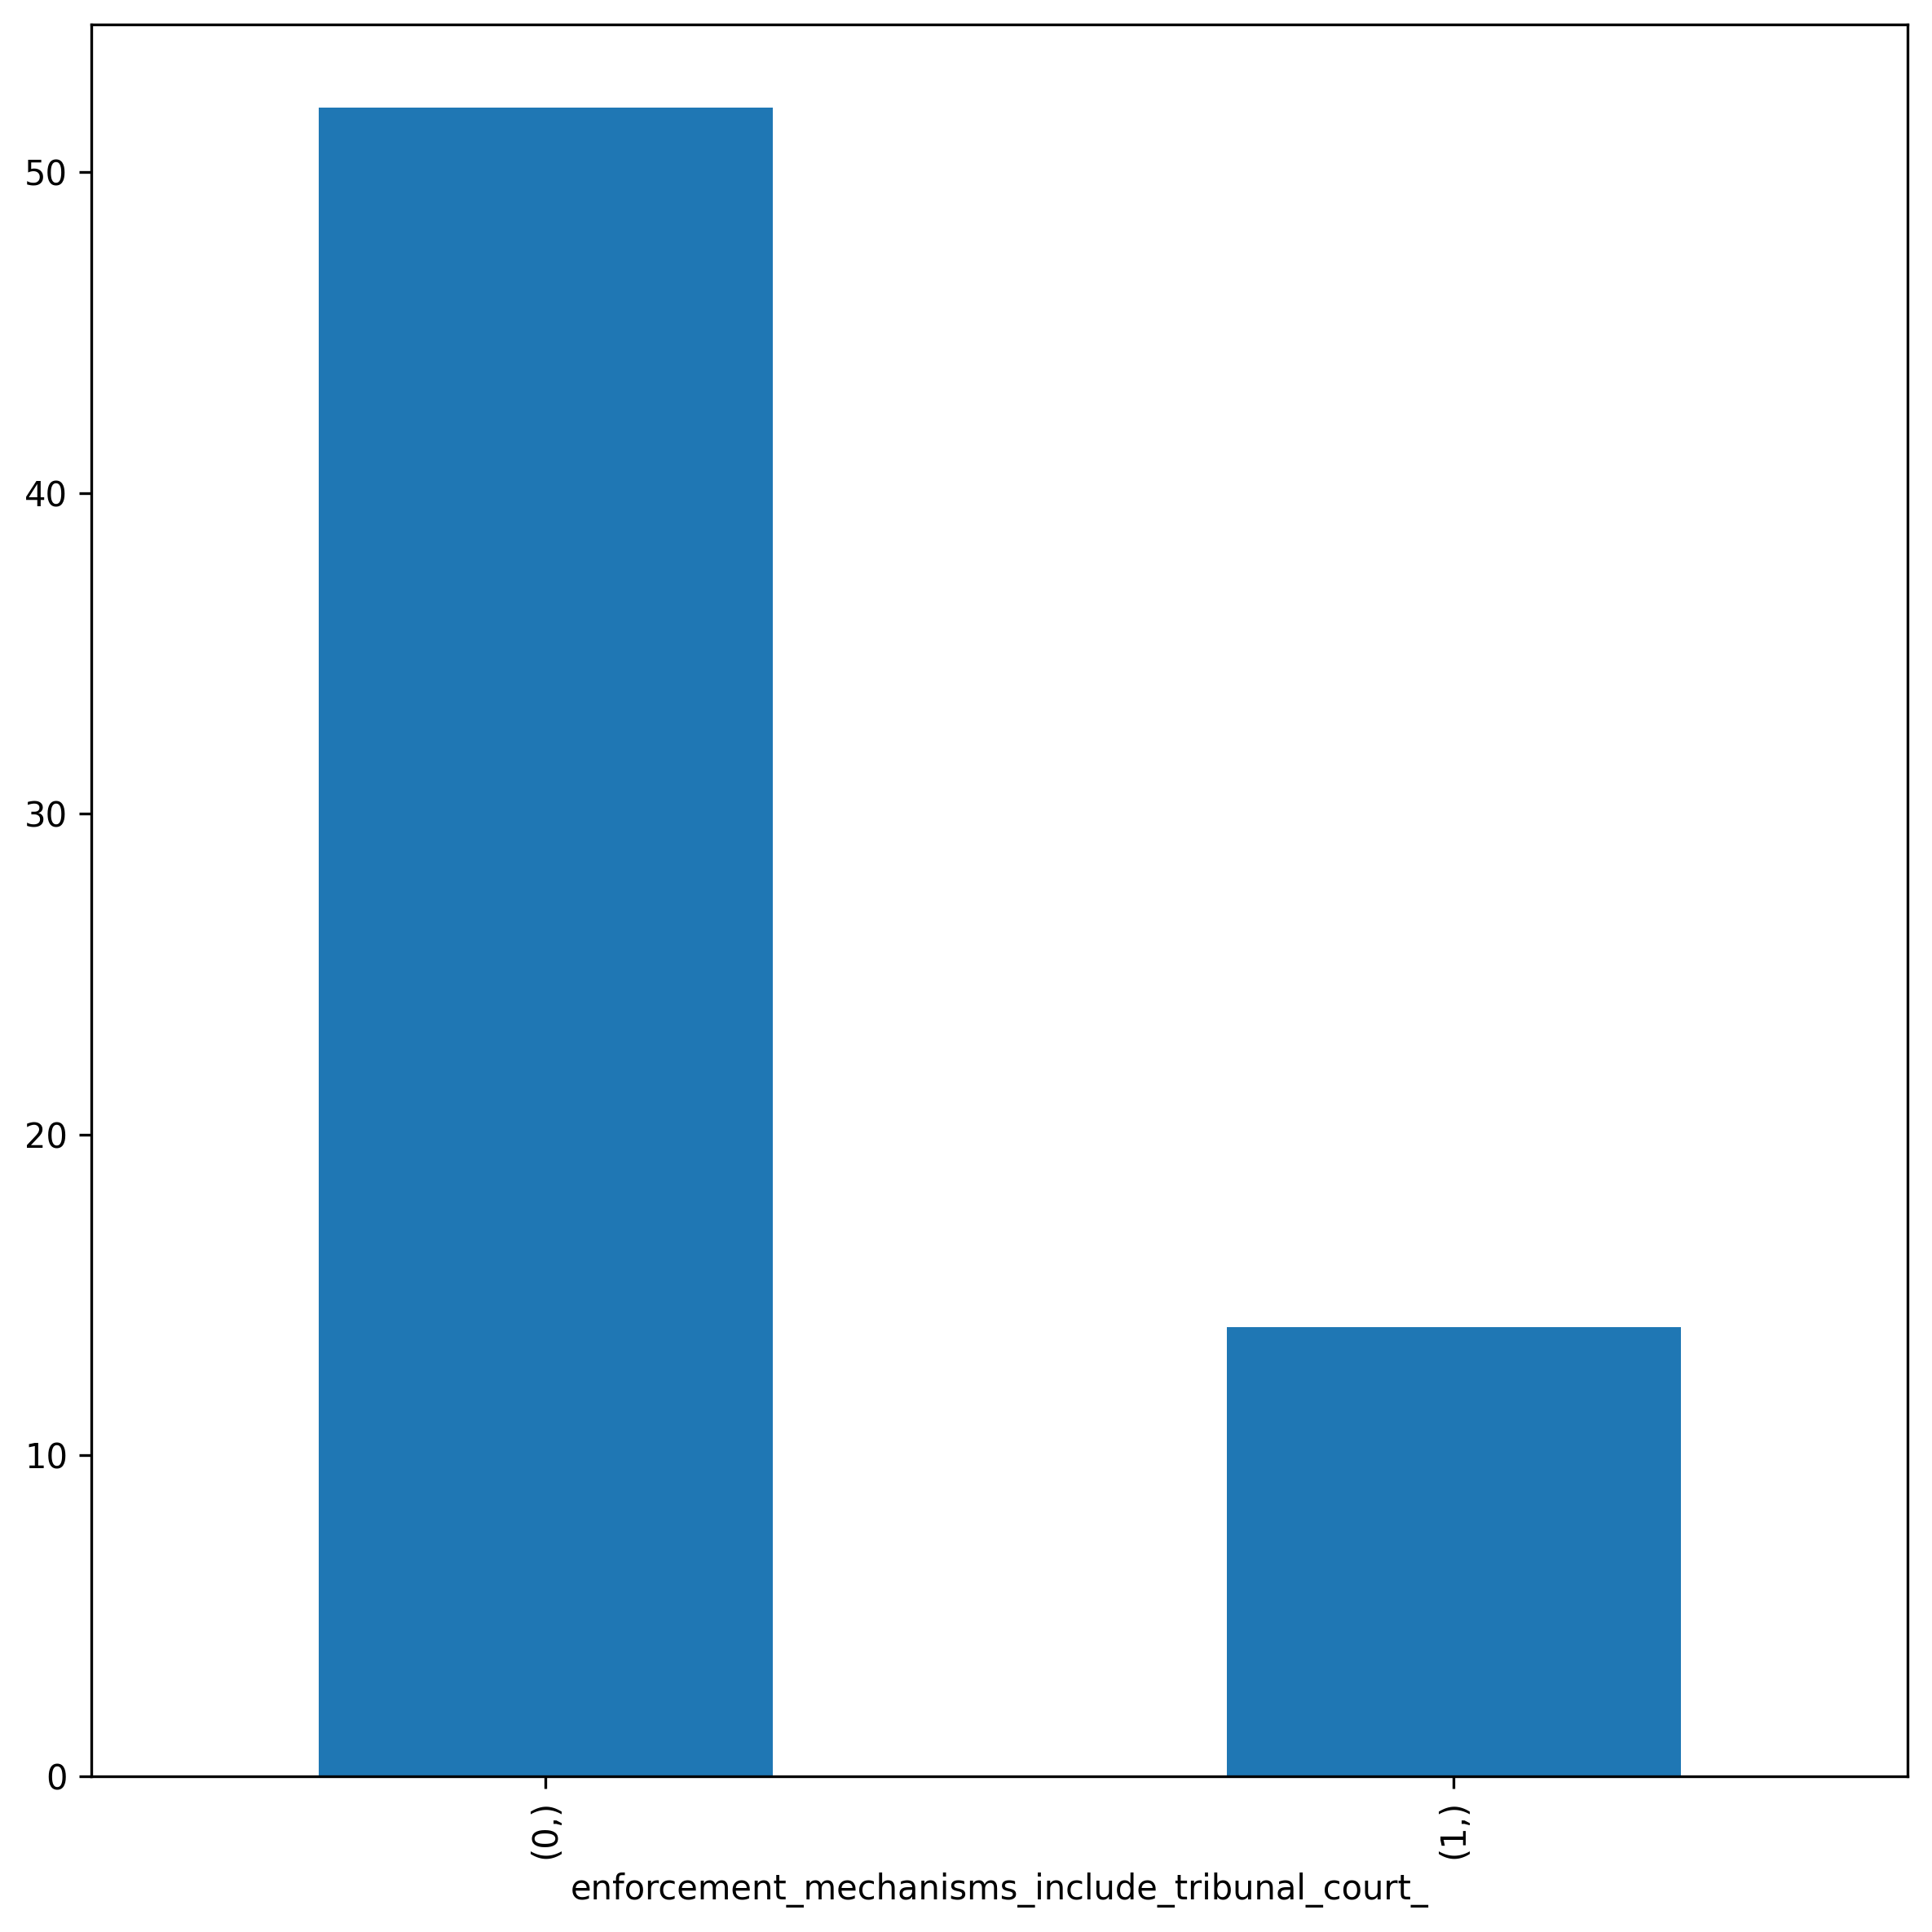

In [39]:
plt.figure(figsize=(8,8))

gov_df[court_col].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig('../fig-courts/histogram.png')
plt.show()

## Correlations

In [40]:
data_plot = gov_df.select_dtypes(include=[np.number]).dropna()

In [41]:
data_plot.describe()

Time span: Start  Time span: End  \
count         66.000000       66.000000   
mean         602.242424      975.590909   
std         1379.228157     1260.662805   
min        -4100.000000    -3300.000000   
25%         -460.000000      -27.000000   
50%         1100.000000     1580.000000   
75%         1700.000000     1900.000000   
max         1900.000000     2023.000000   

       access_mechanisms_include_open_political_unit  \
count                                      66.000000   
mean                                        0.045455   
std                                         0.209895   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       enforcement_mechanisms_include_suspension_expulsion_ostracism_proscription  \
count                                          66.000000                            
mean                                            0.136364                            
std                                             0.345804                            
min                                             0.000000                            
25%                                             0.000000                            
50%                                             0.000000                            
75%                                             0.000000                            
max                                             1.000000                            

       enforcement_mechanisms_include_reputational_risk  \
count                                         66.000000   
mean                                           0.075758   
std                                            0.266638   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       decision_making_mechanisms_include_consensus  \
count                                     66.000000   
mean                                       0.257576   
std                                        0.440650   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.750000   
max                                        1.000000   

       access_mechanisms_include_life_appointment  \
count                                   66.000000   
mean                                     0.030303   
std                                      0.172733   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       decision_making_mechanisms_include_petition  \
count                                    66.000000   
mean                                      0.015152   
std                                       0.123091   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       access_mechanisms_include_heredity  \
count                           66.000000   
mean                             0.348485   
std                              0.480142   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              1.00000

In [42]:
normalized = Normalizer().fit_transform(data_plot)

norm_df = pd.DataFrame(normalized)
norm_df.columns = data_plot.columns
norm_corr = norm_df.corr()

norm_corr.head()

Time span: Start  \
Time span: Start                                            1.000000   
Time span: End                                              0.947680   
access_mechanisms_include_open_political_unit              -0.150542   
enforcement_mechanisms_include_suspension_expul...         -0.326171   
enforcement_mechanisms_include_reputational_risk            0.192272   

                                                    Time span: End  \
Time span: Start                                          0.947680   
Time span: End                                            1.000000   
access_mechanisms_include_open_political_unit            -0.144171   
enforcement_mechanisms_include_suspension_expul...       -0.264573   
enforcement_mechanisms_include_reputational_risk          0.169135   

                                                    access_mechanisms_include_open_political_unit  \
Time span: Start                                                                        -0.150542   
Time span: End                                                                          -0.144171   
access_mechanisms_include_open_political_unit                                            1.000000   
enforcement_mechanisms_include_suspension_expul...                                      -0.058675   
enforcement_mechanisms_include_reputational_risk                                        -0.051547   

                                                    enforcement_mechanisms_include_suspension_expulsion_ostracism_proscription  \
Time span: Start                                                                            -0.326171                            
Time span: End                                                                              -0.264573                            
access_mechanisms_include_open_political_unit                                               -0.058675                            
enforcement_mechanisms_include_suspension_expul...                                           1.000000                            
enforcement_mechanisms_include_reputational_risk                                             0.047620                            

                                                    enforcement_mechanisms_include_reputational_risk  \
Time span: Start                                                                            0.192272   
Time span: End                                                                              0.169135   
access_mechanisms_include_open_political_unit                                              -0.051547   
enforcement_mechanisms_include_suspension_expul...                                          0.047620   
enforcement_mechanisms_include_reputational_risk                                            1.000000   

                                                    decision_making_mechanisms_include_consensus  \
Time span: Start                                                                       -0.139232   
Time span: End                                                                         -0.085370   
access_mechanisms_include_open_political_unit                                          -0.053096   
enforcement_mechanisms_include_suspension_expul...                                      0.450020   
enforcement_mechanisms_include_reputational_risk                                       -0.078240   

                                                    access_mechanisms_include_life_appointment  \
Time span: Start                                                                      0.113415   
Time span: End                                                                        0.114231   
access_mechanisms_include_open_political_unit                                        -0.032338   
enforcement_mechanisms_include_suspension_expul...                                   -0.056682   
enforcement_mechanisms_include_reputational_risk                                     -0.049796

In [44]:
courts_corr = norm_corr[court_col]

In [45]:
courts_corr

enforcement_mechanisms_include_tribunal_court_
Time span: Start                                                                         -0.293380
Time span: End                                                                           -0.235446
access_mechanisms_include_open_political_unit                                            -0.033419
enforcement_mechanisms_include_suspension_expul...                                        0.517675
enforcement_mechanisms_include_reputational_risk                                         -0.067144
decision_making_mechanisms_include_consensus                                              0.154058
access_mechanisms_include_life_appointment                                                0.031266
decision_making_mechanisms_include_petition                                               0.046266
access_mechanisms_include_heredity                                                       -0.210706
decision_making_mechanisms_include_president_co...                                       -0.096698
access_mechanisms_include_property_requirement                                            0.438672
enforcement_mechanisms_include_destruction_of_p...                                       -0.071686
enforcement_mechanisms_include_paying_damages_c...                                        0.441458
decision_making_mechanisms_include_supermajority                                          0.099806
access_mechanisms_include_patronage_for_office                                           -0.071740
enforcement_mechanisms_include_exit                                                       0.010847
access_mechanisms_include_matrilineality                                                 -0.079356
decision_making_mechanisms_include_balance_of_p...                                       -0.075284
access_mechanisms_include_election                                                        0.034108
access_mechanisms_include_gerontocracy                                                   -0.063151
decision_making_mechanisms_include_board_committee                                       -0.128096
decision_making_mechanisms_include_autocratic_l...                                        0.326001
enforcement_mechanisms_include_forced_labour                                             -0.050343
decision_making_mechanisms_include_unanimity                                              0.004921
decision_making_mechanisms_include_public_meetings                                        0.170968
access_mechanisms_include_dreaming                                                       -0.088497
decision_making_mechanisms_include_secret_ballot                                          0.291230
enforcement_mechanisms_include_civil_disobedience                                        -0.071404
decision_making_mechanisms_include_council_local                                         -0.133781
decision_making_mechanisms_include_vote_by_show...                                        0.291230
decision_making_mechanisms_include_constitution                                           0.346150
enforcement_mechanisms_include_jury_judge                                                 0.396048
access_mechanisms_include_induction_rite_ceremony                                        -0.050343
access_mechanisms_include_blood_relations                                                 0.369388
decision_making_mechanisms_include_veto                                                   0.313508
enforcement_mechanisms_include_mediation                                                  0.061439
enforcement_mechanisms_include_self-help                                                  0.422586
decision_making_mechanisms_include_deliberation                                           0.311231
decision_making_mechanisms_include_rule_of_law                                            0.211721
decision_making_mechanisms_include_turnover_rot...                                        0.

In [52]:
plt.figure(figsize=(25,25))
sns.heatmap(
    courts_corr.sort_values(by='enforcement_mechanisms_include_tribunal_court_', ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../fig-courts/courts_corr.png')
plt.show()

## Courts Analysis: Mechanisms

### Access

In [53]:
access_courts_corr = courts_corr[courts_corr.index.str.startswith('access')]

In [54]:
access_courts_corr

enforcement_mechanisms_include_tribunal_court_
access_mechanisms_include_open_political_unit                                            -0.033419
access_mechanisms_include_life_appointment                                                0.031266
access_mechanisms_include_heredity                                                       -0.210706
access_mechanisms_include_property_requirement                                            0.438672
access_mechanisms_include_patronage_for_office                                           -0.071740
access_mechanisms_include_matrilineality                                                 -0.079356
access_mechanisms_include_election                                                        0.034108
access_mechanisms_include_gerontocracy                                                   -0.063151
access_mechanisms_include_dreaming                                                       -0.088497
access_mechanisms_include_induction_rite_ceremony                                        -0.050343
access_mechanisms_include_blood_relations                                                 0.369388
access_mechanisms_include_lottery_random_selection                                        0.269027
access_mechanisms_include_matriarchy                                                     -0.039273
access_mechanisms_include_age_boundaries                                                  0.301617
access_mechanisms_include_payment_for_occupying...                                       -0.050343
access_mechanisms_include_screening_process                                               0.254248
access_mechanisms_include_popularity_                                                    -0.071569
access_mechanisms_include_meritocracy                                                    -0.191903
access_mechanisms_include_divine_right                                                    0.091804
access_mechanisms_include_enfranchisement                                                -0.088537
access_mechanisms_include_co-optation                                                    -0.102270

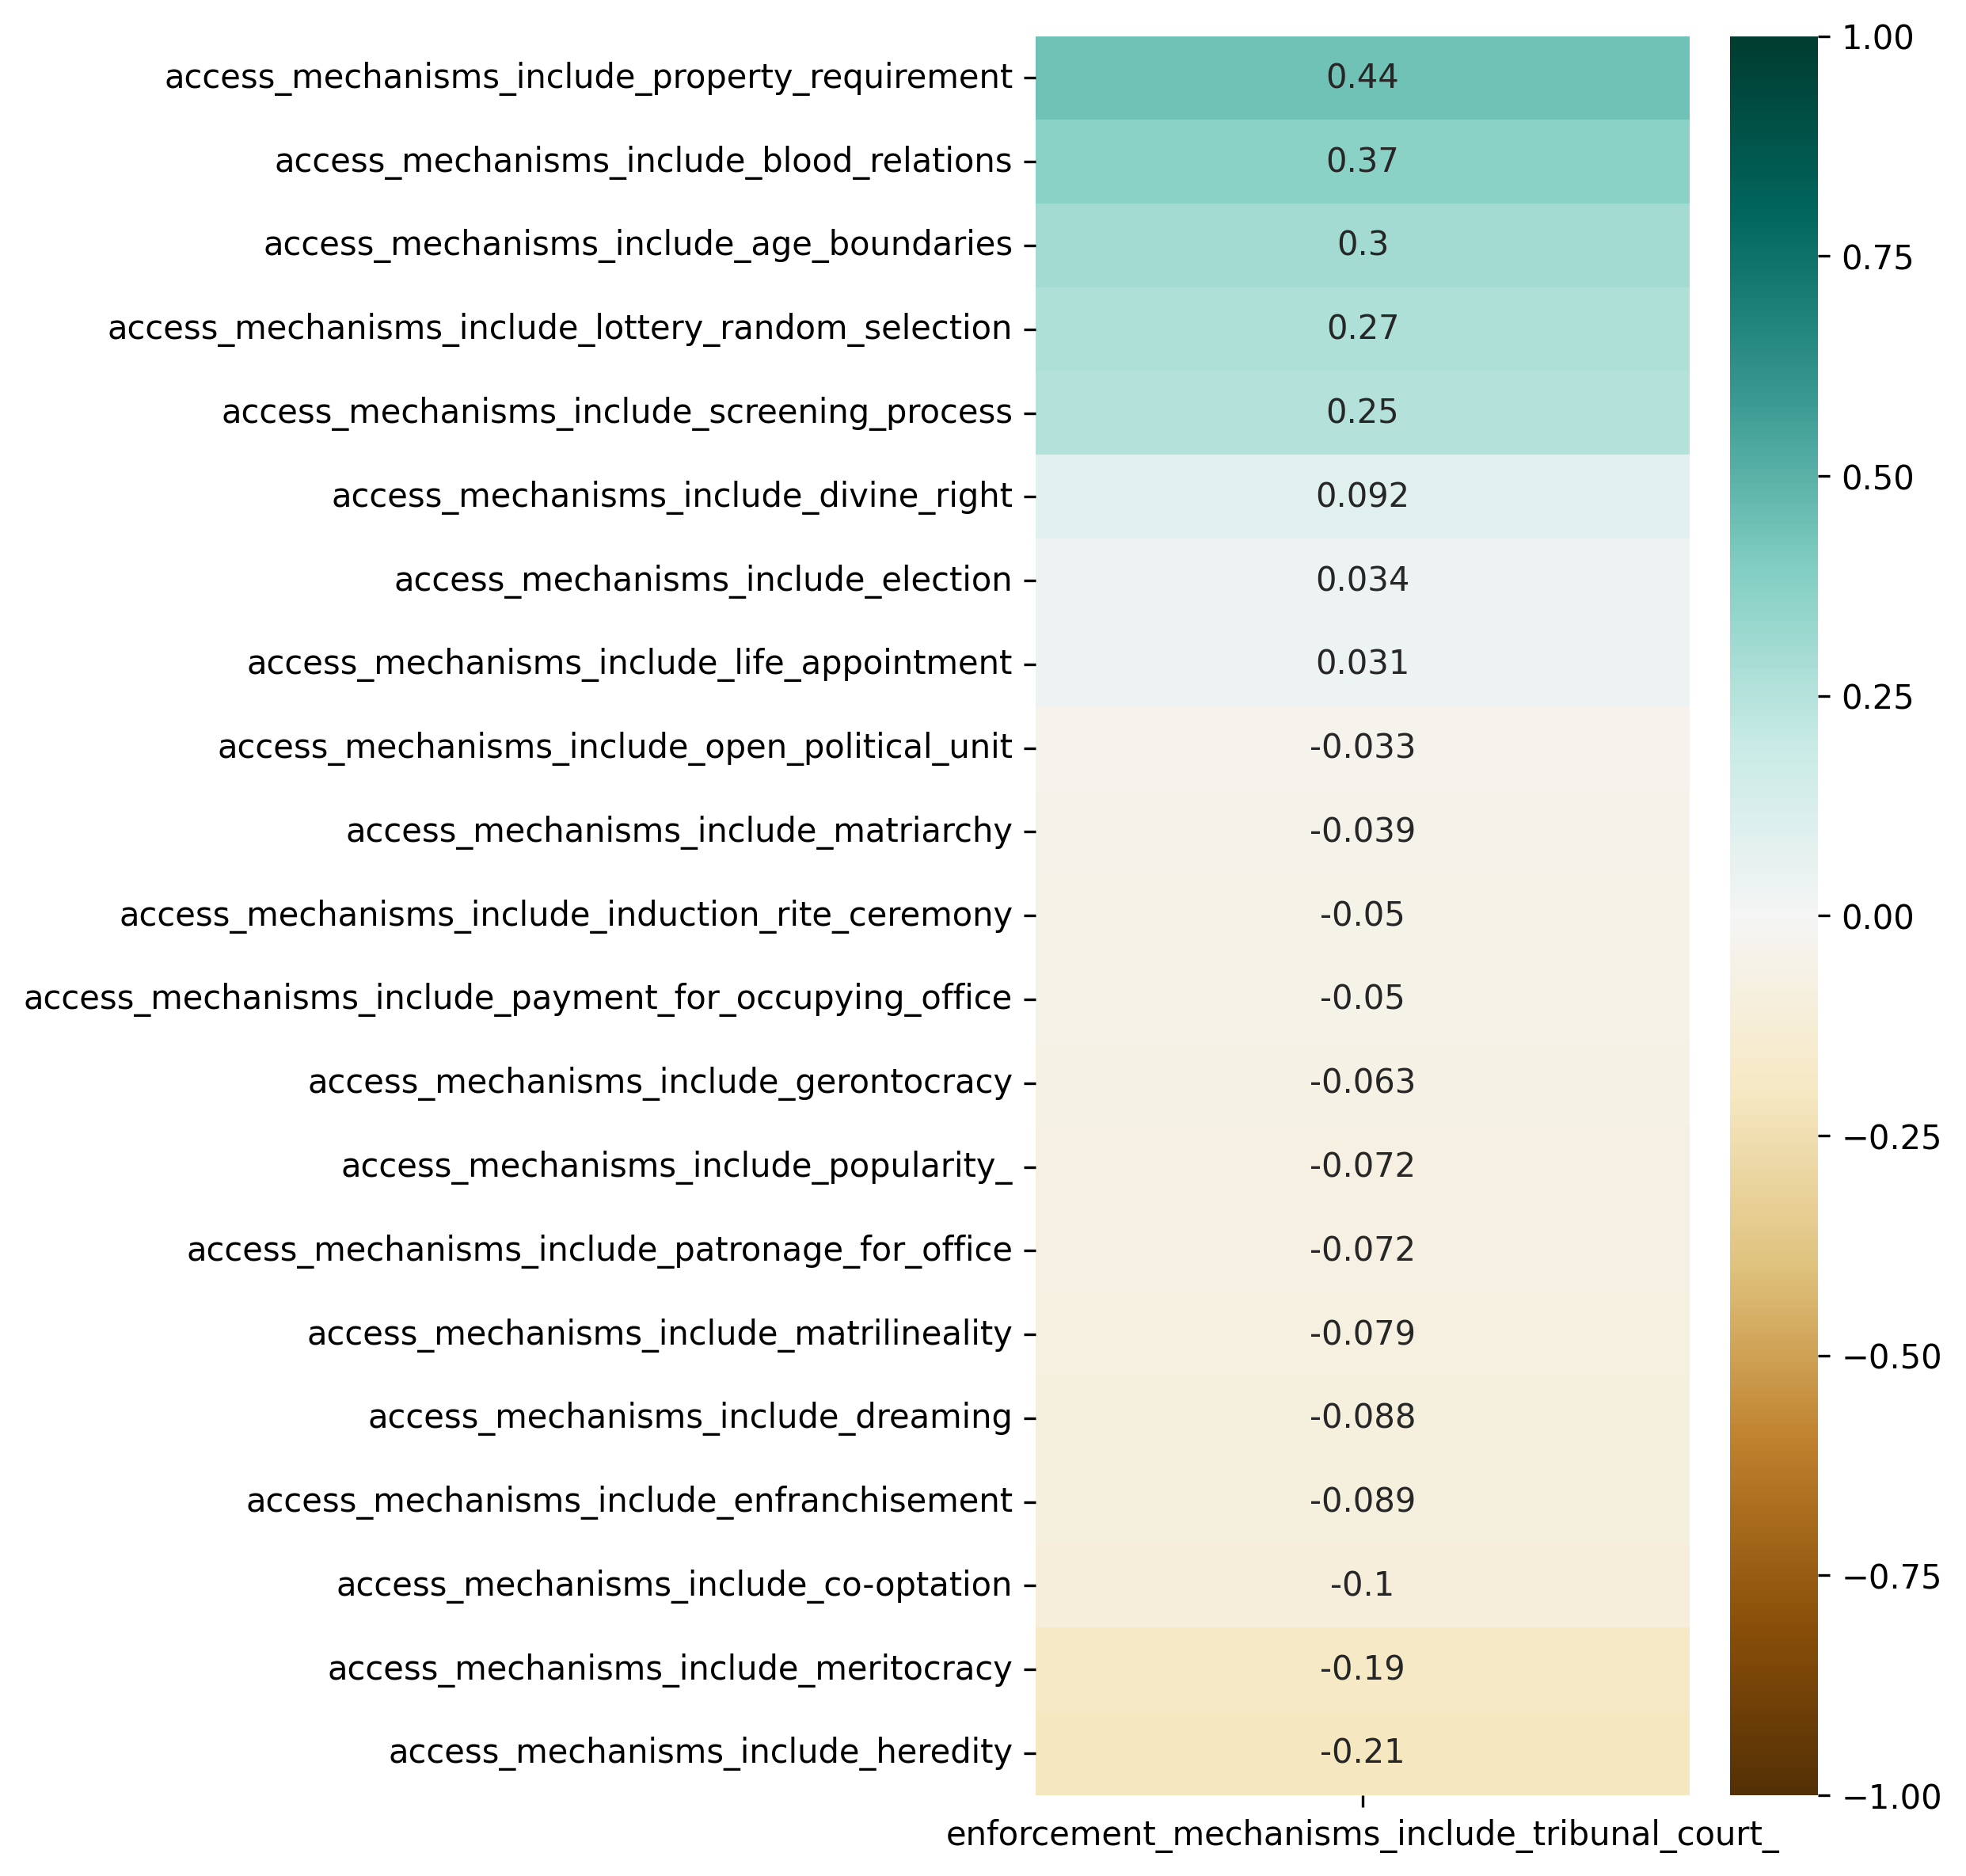

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(
    access_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../fig-courts/access_courts_corr.png')
plt.show()

### Decision Making

In [58]:
dm_courts_corr = courts_corr[courts_corr.index.str.startswith('decision_making')]

In [59]:
dm_courts_corr

enforcement_mechanisms_include_tribunal_court_
decision_making_mechanisms_include_consensus                                              0.154058
decision_making_mechanisms_include_petition                                               0.046266
decision_making_mechanisms_include_president_co...                                       -0.096698
decision_making_mechanisms_include_supermajority                                          0.099806
decision_making_mechanisms_include_balance_of_p...                                       -0.075284
decision_making_mechanisms_include_board_committee                                       -0.128096
decision_making_mechanisms_include_autocratic_l...                                        0.326001
decision_making_mechanisms_include_unanimity                                              0.004921
decision_making_mechanisms_include_public_meetings                                        0.170968
decision_making_mechanisms_include_secret_ballot                                          0.291230
decision_making_mechanisms_include_council_local                                         -0.133781
decision_making_mechanisms_include_vote_by_show...                                        0.291230
decision_making_mechanisms_include_constitution                                           0.346150
decision_making_mechanisms_include_veto                                                   0.313508
decision_making_mechanisms_include_deliberation                                           0.311231
decision_making_mechanisms_include_rule_of_law                                            0.211721
decision_making_mechanisms_include_turnover_rot...                                        0.277718
decision_making_mechanisms_include_dual-sex_pol...                                        0.025167
decision_making_mechanisms_include_voting                                                 0.239861
decision_making_mechanisms_include_checks_and_b...                                       -0.054130
decision_making_mechanisms_include_assembly_cen...                                        0.449091
decision_making_mechanisms_include_consultation                                          -0.070413
decision_making_mechanisms_include_frequent_and...                                        0.361500
decision_making_mechanisms_include_quorum                                                 0.302561
decision_making_mechanisms_include_vote_by_proxy                                         -0.071608
decision_making_mechanisms_include_handshake                                             -0.050343
decision_making_mechanisms_include_coalition                                             -0.050343
decision_making_mechanisms_include_agenda_setting                                         0.274043
decision_making_mechanisms_include_delegation                                             0.257682
decision_making_mechanisms_include_bureaucracy                                            0.000909
decision_making_mechanisms_include_power_fluidity                                        -0.050343
decision_making_mechanisms_include_kingchief-as...                                       -0.062531
decision_making_mechanisms_include_group_voting                                          -0.071731
decision_making_mechanisms_include_majority_voting                                        0.323687
decision_making_mechanisms_include_confederacy                                            0.031266
decision_making_mechanisms_include_leader_first...                                       -0.155480
decision_making_mechanisms_include_ratification...                                        0.112399
decision_making_mechanisms_include_temporary_po...                                        0.135830
decision_making_mechanisms_include_autocratic_l...                                       -0.065831
decision_making_mechanisms_include_plurality_vo...                                        0.

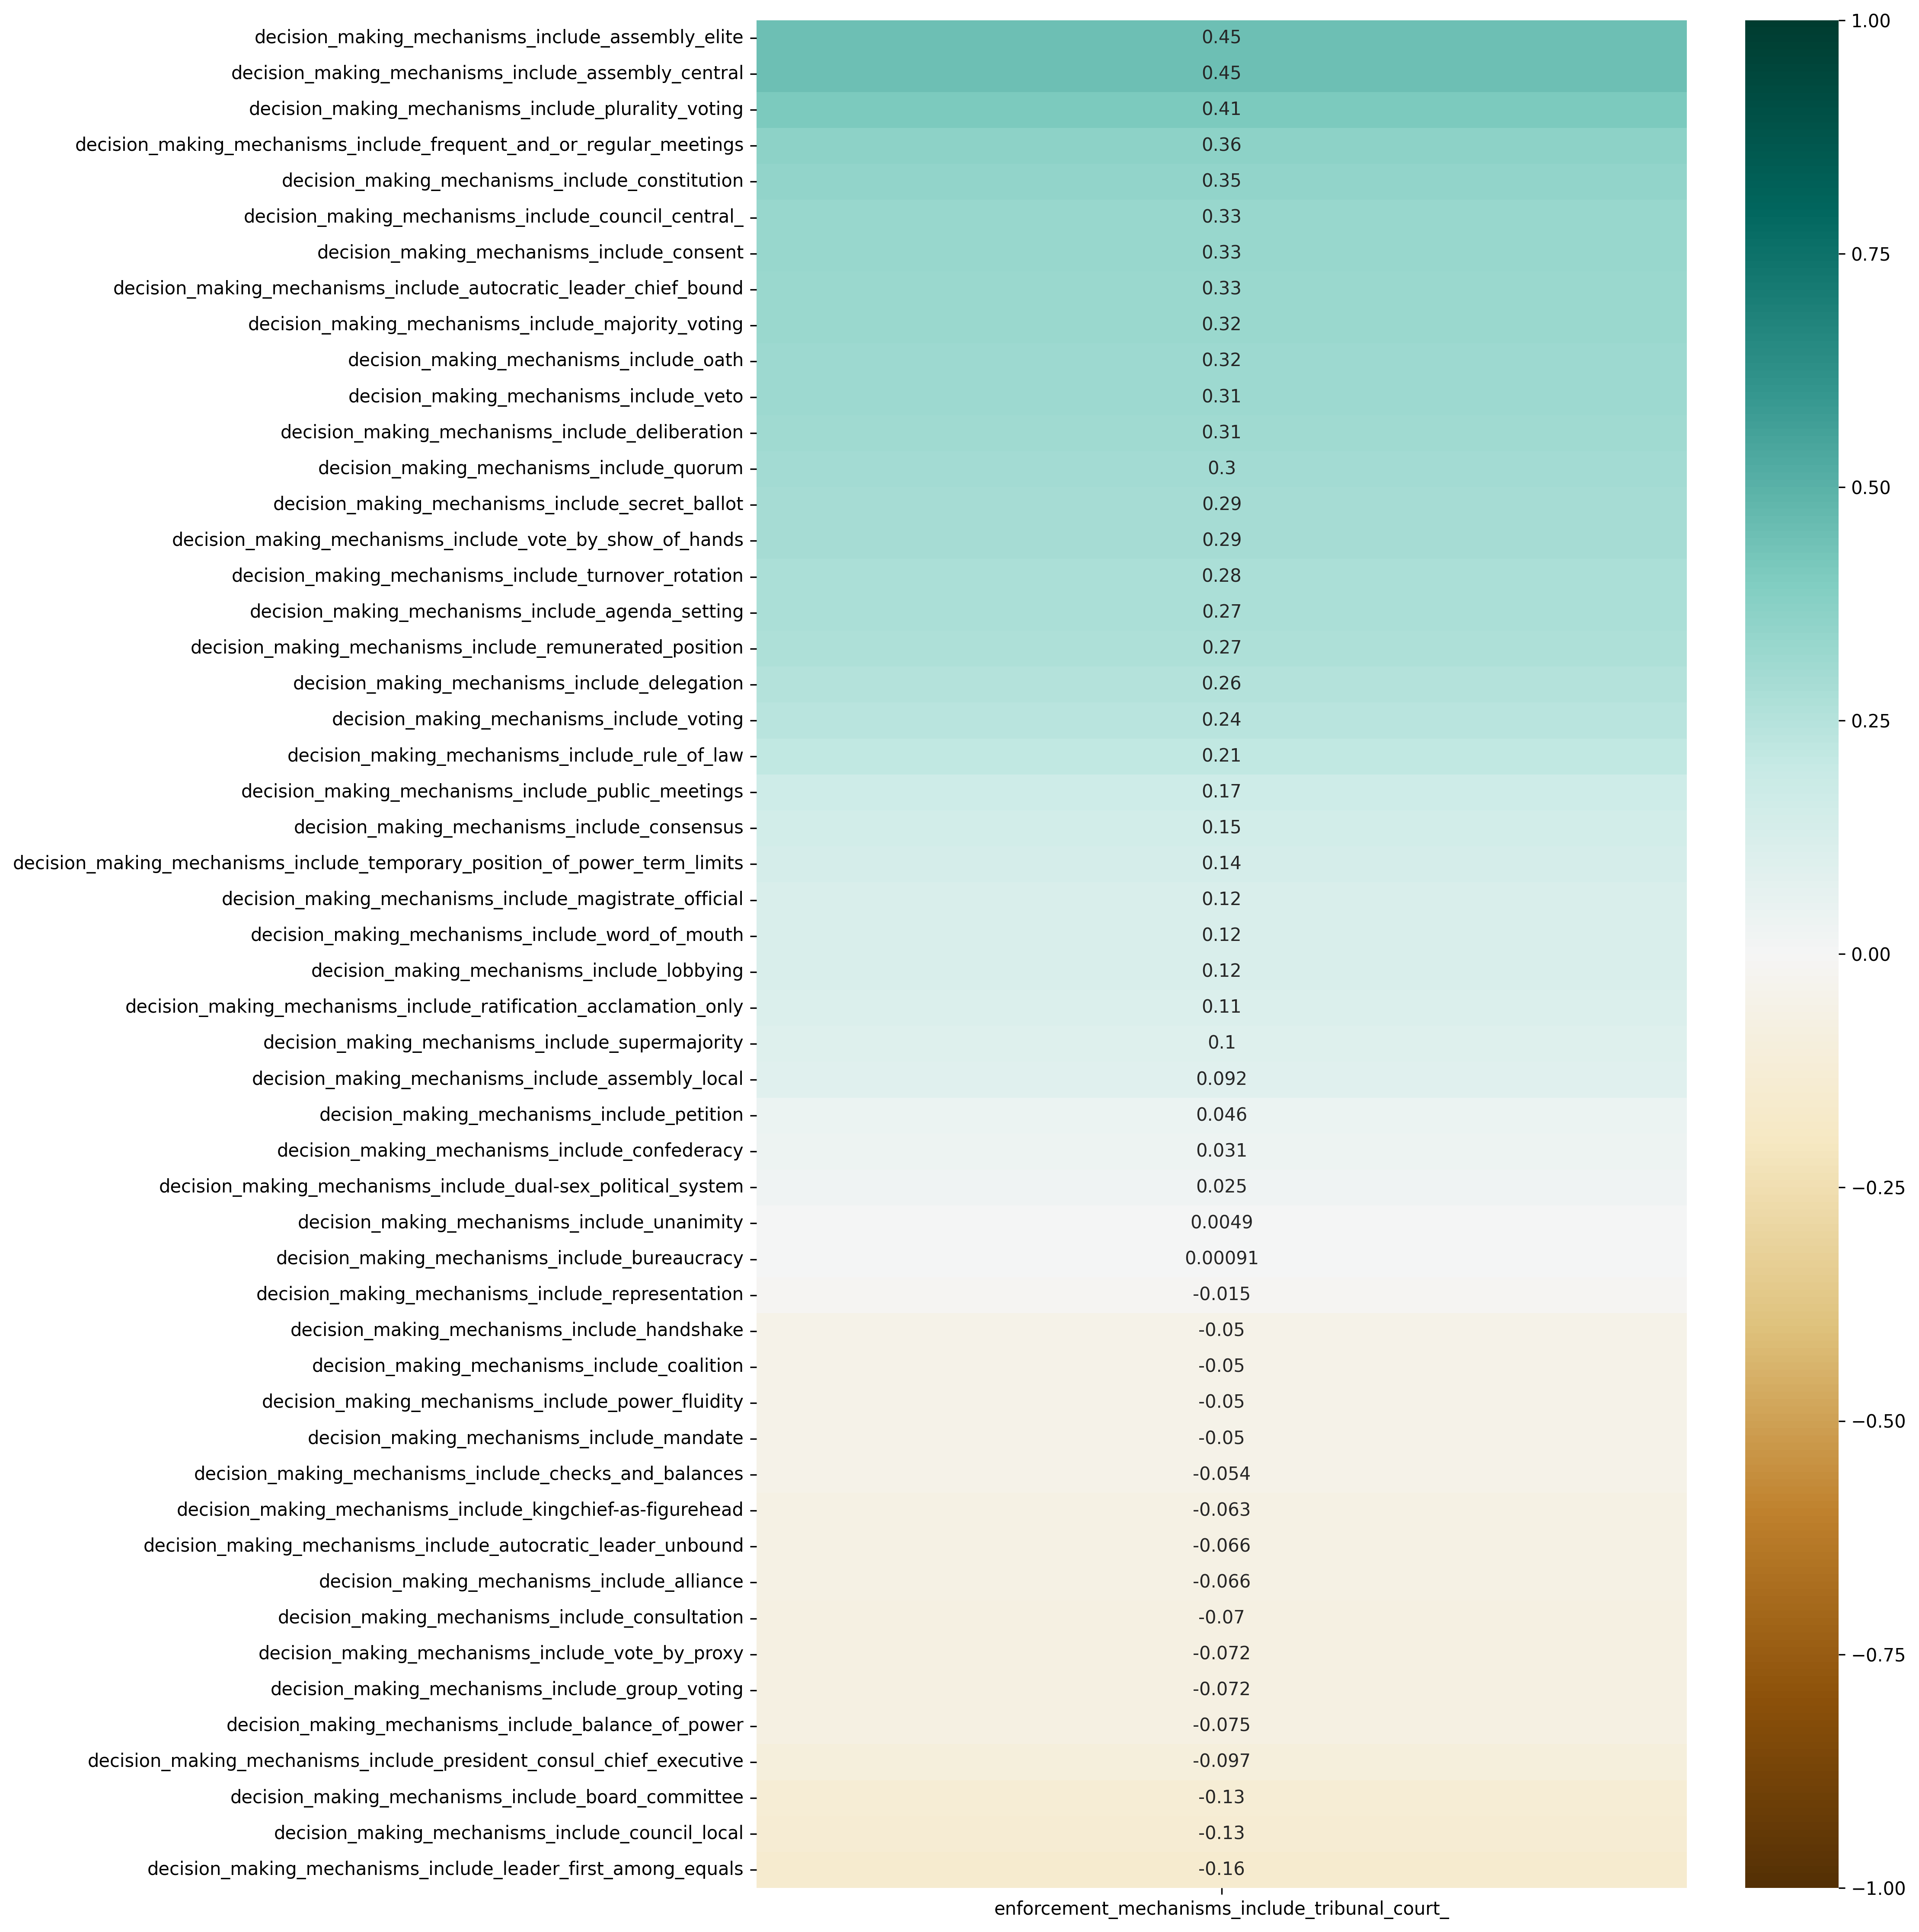

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dm_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../fig-courts/dm_courts_corr.png')
plt.show()

### Enforcement

In [61]:
enforcement_courts_corr = courts_corr[courts_corr.index.str.startswith('enforcement')]

In [62]:
enforcement_courts_corr

enforcement_mechanisms_include_tribunal_court_
enforcement_mechanisms_include_suspension_expul...                                        0.517675
enforcement_mechanisms_include_reputational_risk                                         -0.067144
enforcement_mechanisms_include_destruction_of_p...                                       -0.071686
enforcement_mechanisms_include_paying_damages_c...                                        0.441458
enforcement_mechanisms_include_exit                                                       0.010847
enforcement_mechanisms_include_forced_labour                                             -0.050343
enforcement_mechanisms_include_civil_disobedience                                        -0.071404
enforcement_mechanisms_include_jury_judge                                                 0.396048
enforcement_mechanisms_include_mediation                                                  0.061439
enforcement_mechanisms_include_self-help                                                  0.422586
enforcement_mechanisms_include_seizing_of_property                                        0.394139
enforcement_mechanisms_include_appeal                                                     0.042483
enforcement_mechanisms_include_fines                                                      0.438890
enforcement_mechanisms_include_arbitration                                                0.437680
enforcement_mechanisms_include_monitoring                                                 0.421020
enforcement_mechanisms_include_police                                                     0.126273
enforcement_mechanisms_include_graduated_sanctions                                       -0.050343
enforcement_mechanisms_include_military_force                                            -0.050343
enforcement_mechanisms_include_scrutiny_of_offi...                                        0.281662
enforcement_mechanisms_include_corporal_punishm...                                        0.403467
enforcement_mechanisms_include_criticism_mockin...                                        0.423956
enforcement_mechanisms_include_tribunal_court_                                            1.000000
enforcement_mechanisms_include_judicial_review                                            0.433242
enforcement_mechanisms_include_litigation                                                 0.494092
enforcement_mechanisms_include_capital_punishment                                         0.397588
enforcement_mechanisms_include_negotiation                                                0.065935

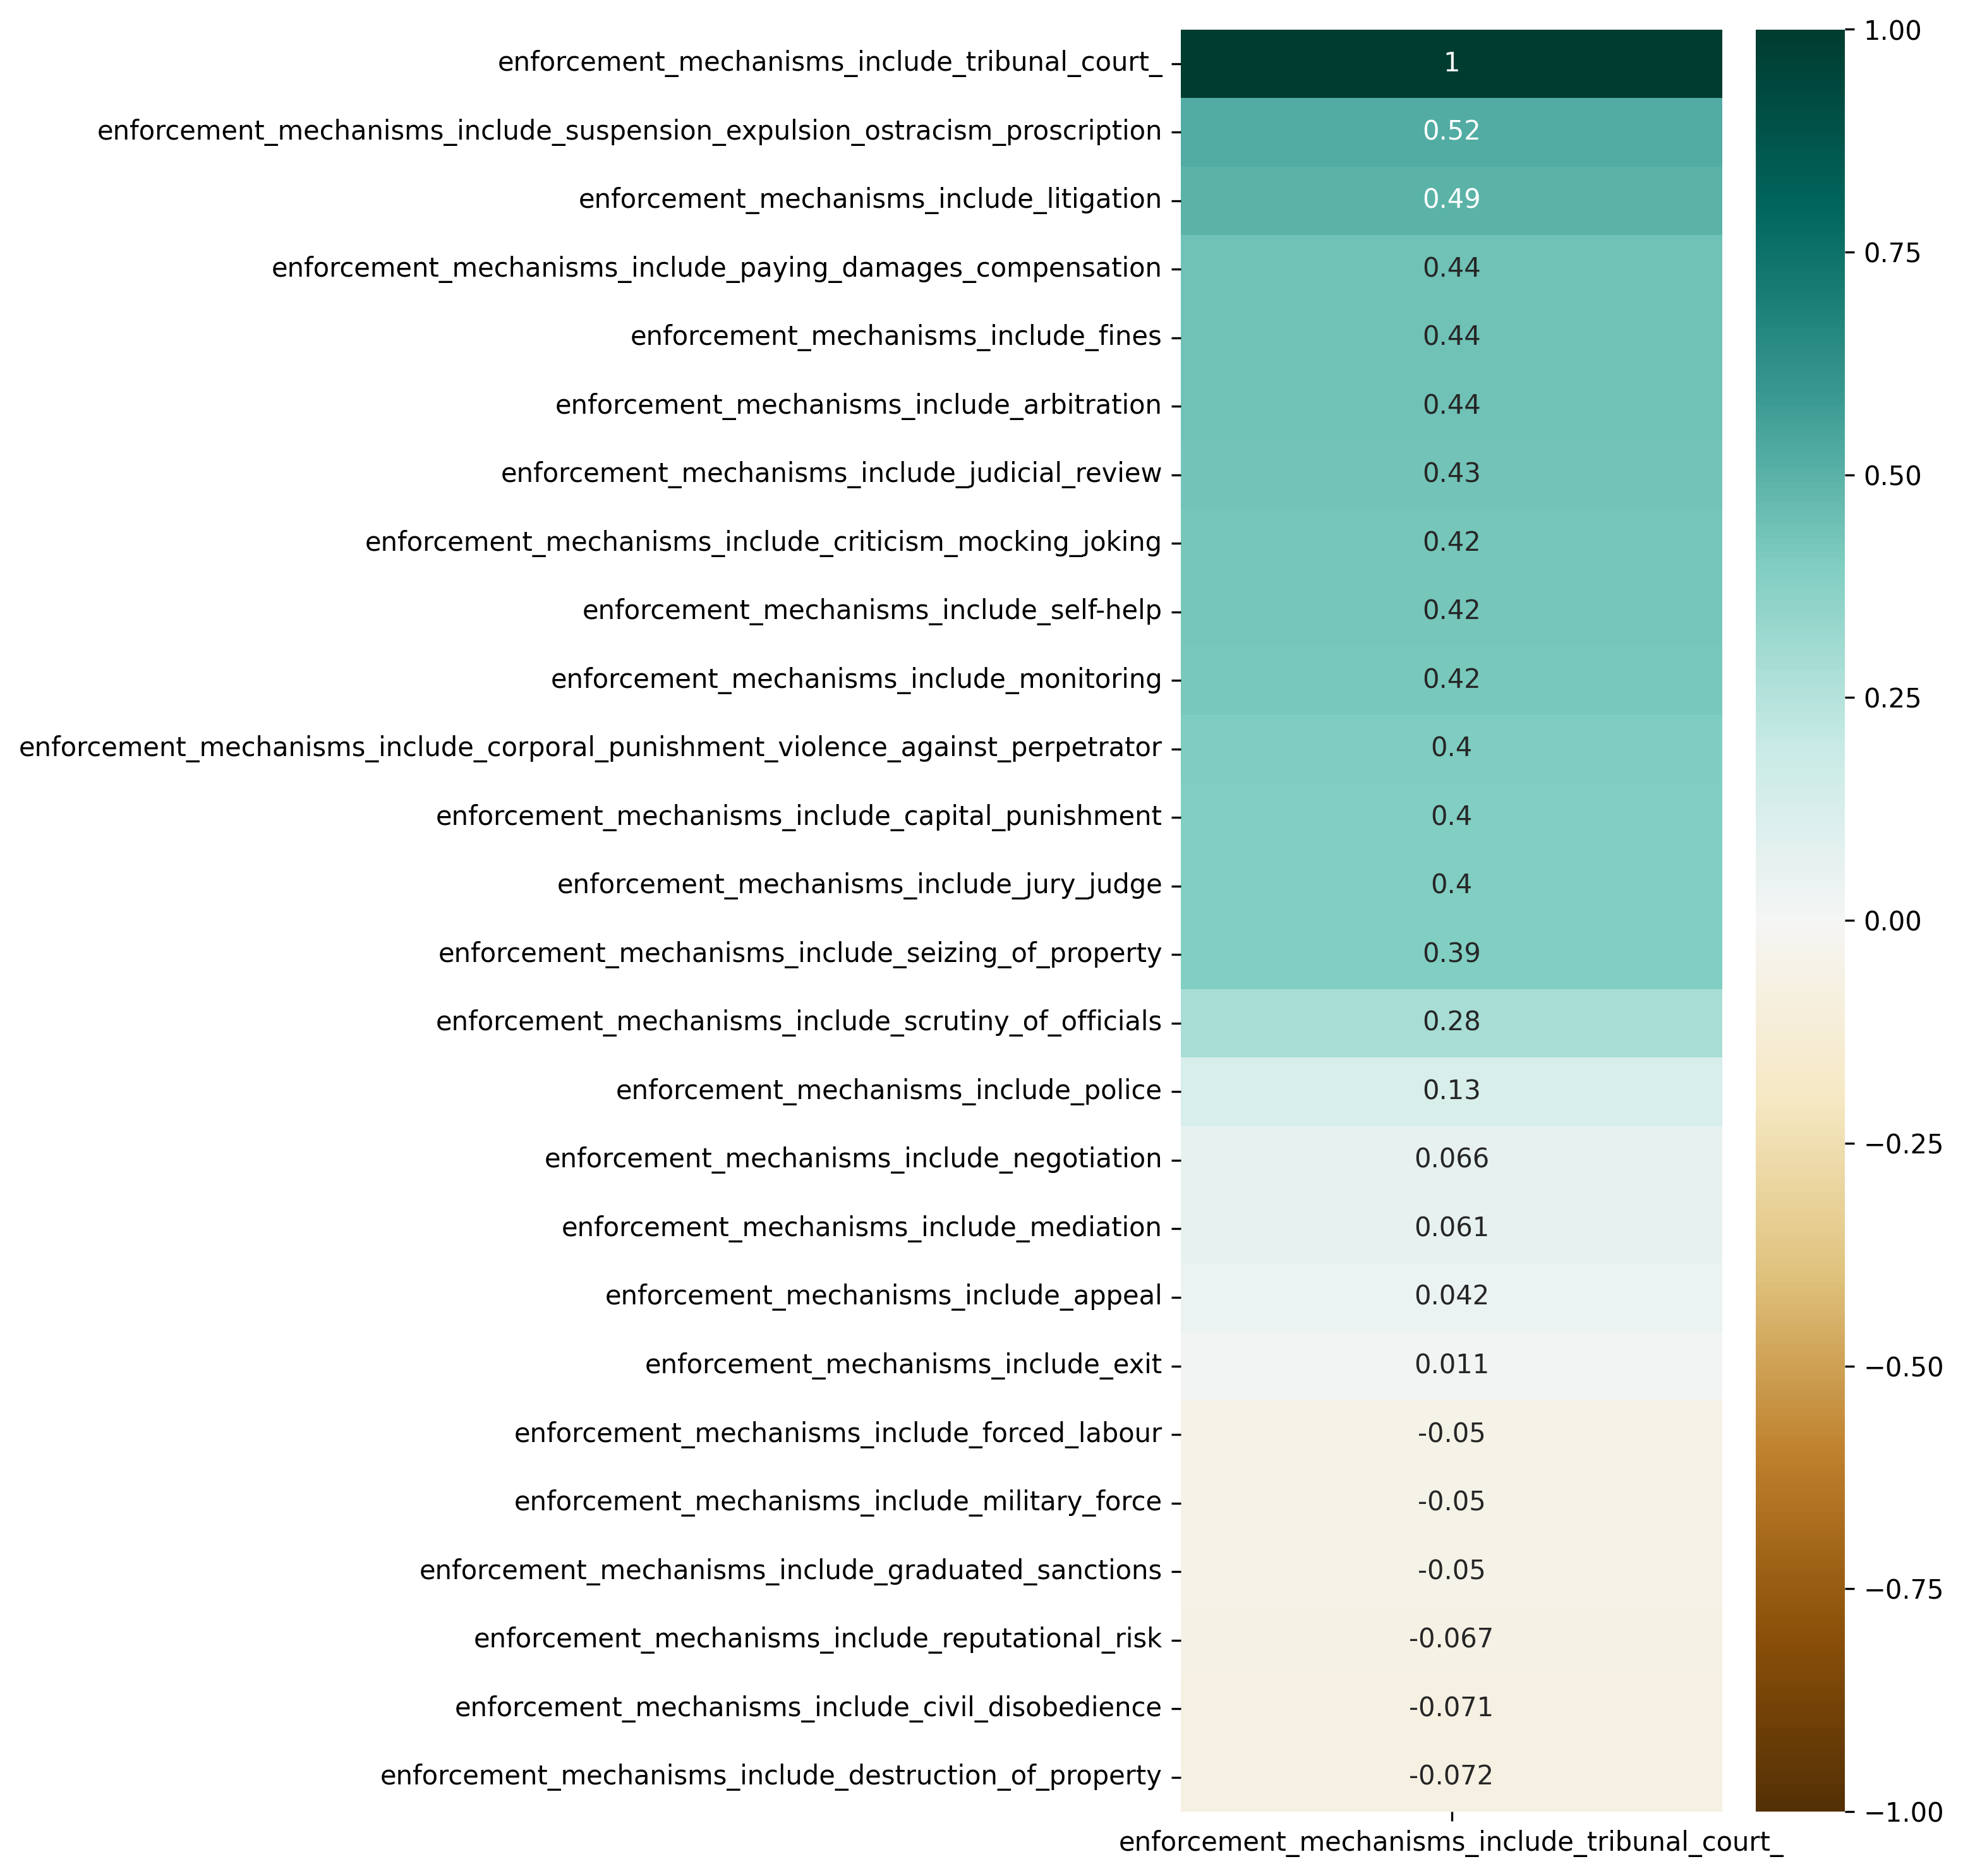

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(
    enforcement_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../fig-courts/enforcement_courts_corr.png')
plt.show()

## Courts Analysis: Size

In [64]:
size_cols = [col for col in col_list if col.startswith('Size:')]
size_cols

['Size: 100 - 1,000',
 'Size: 1,001 - 10,000',
 'Size: 10,001 - 100,000',
 'Size: 100,001 - 1,000,000',
 'Size: 1,000,001 - 10,000,000',
 'Size: 10,000,000+',
 'Size: Unknown']

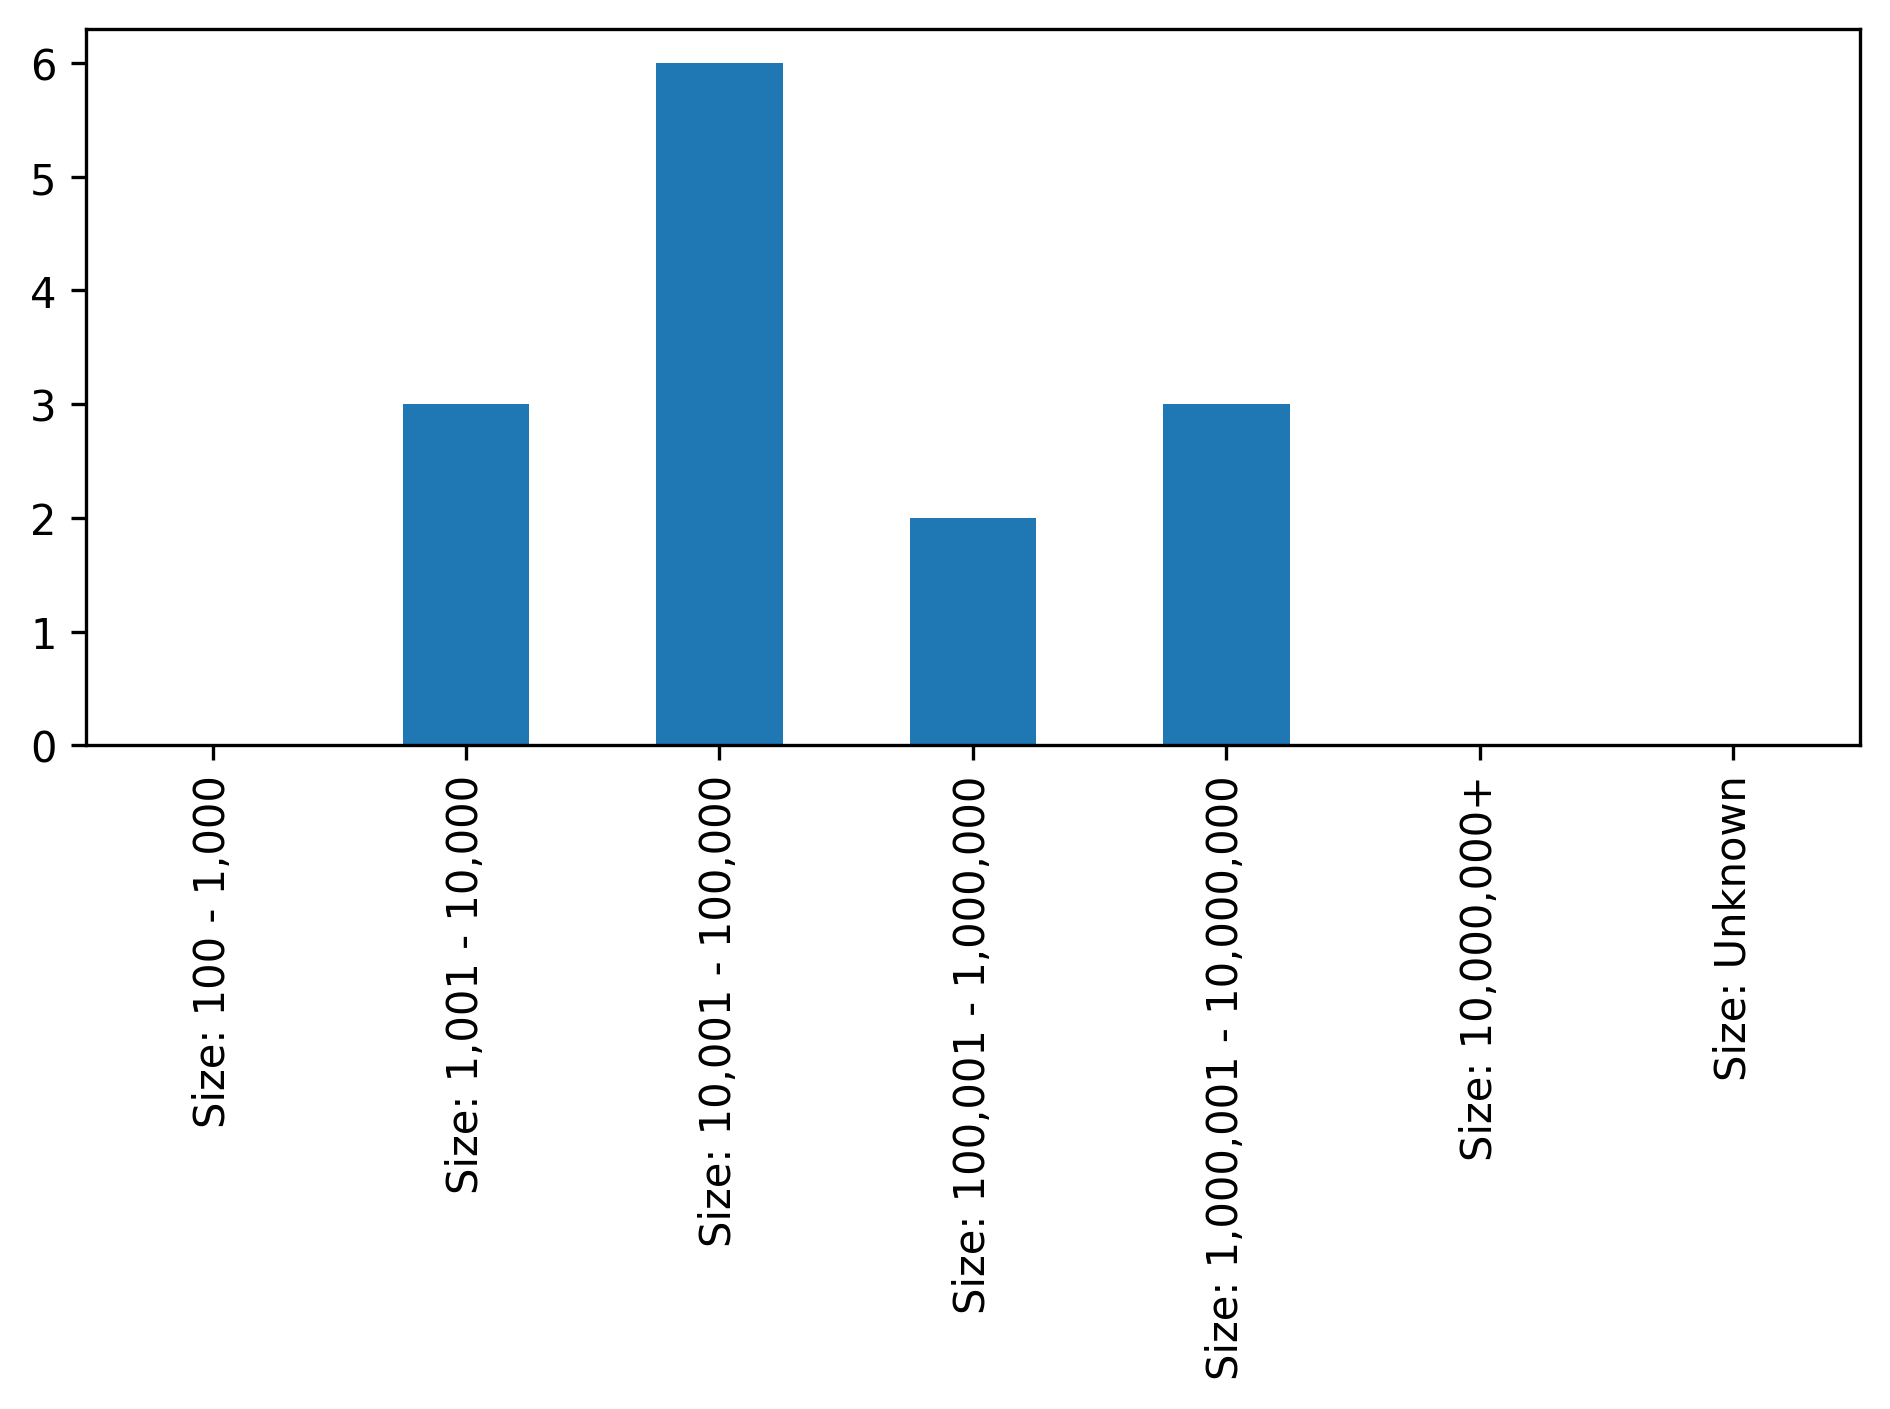

In [66]:
# Size histogram
courts_df[size_cols].sum().plot(kind='bar')

plt.tight_layout()
plt.savefig('../fig-courts/courts_size_histogram.png')
plt.show()

In [67]:
size_courts_corr = courts_corr[courts_corr.index.str.startswith('Size:')]

In [68]:
size_courts_corr

enforcement_mechanisms_include_tribunal_court_
Size: 100 - 1,000                                                  -0.050343
Size: 1,001 - 10,000                                               -0.085236
Size: 10,001 - 100,000                                              0.138488
Size: 100,001 - 1,000,000                                           0.362978
Size: 1,000,001 - 10,000,000                                        0.057560
Size: 10,000,000+                                                  -0.094058
Size: Unknown                                                      -0.105247

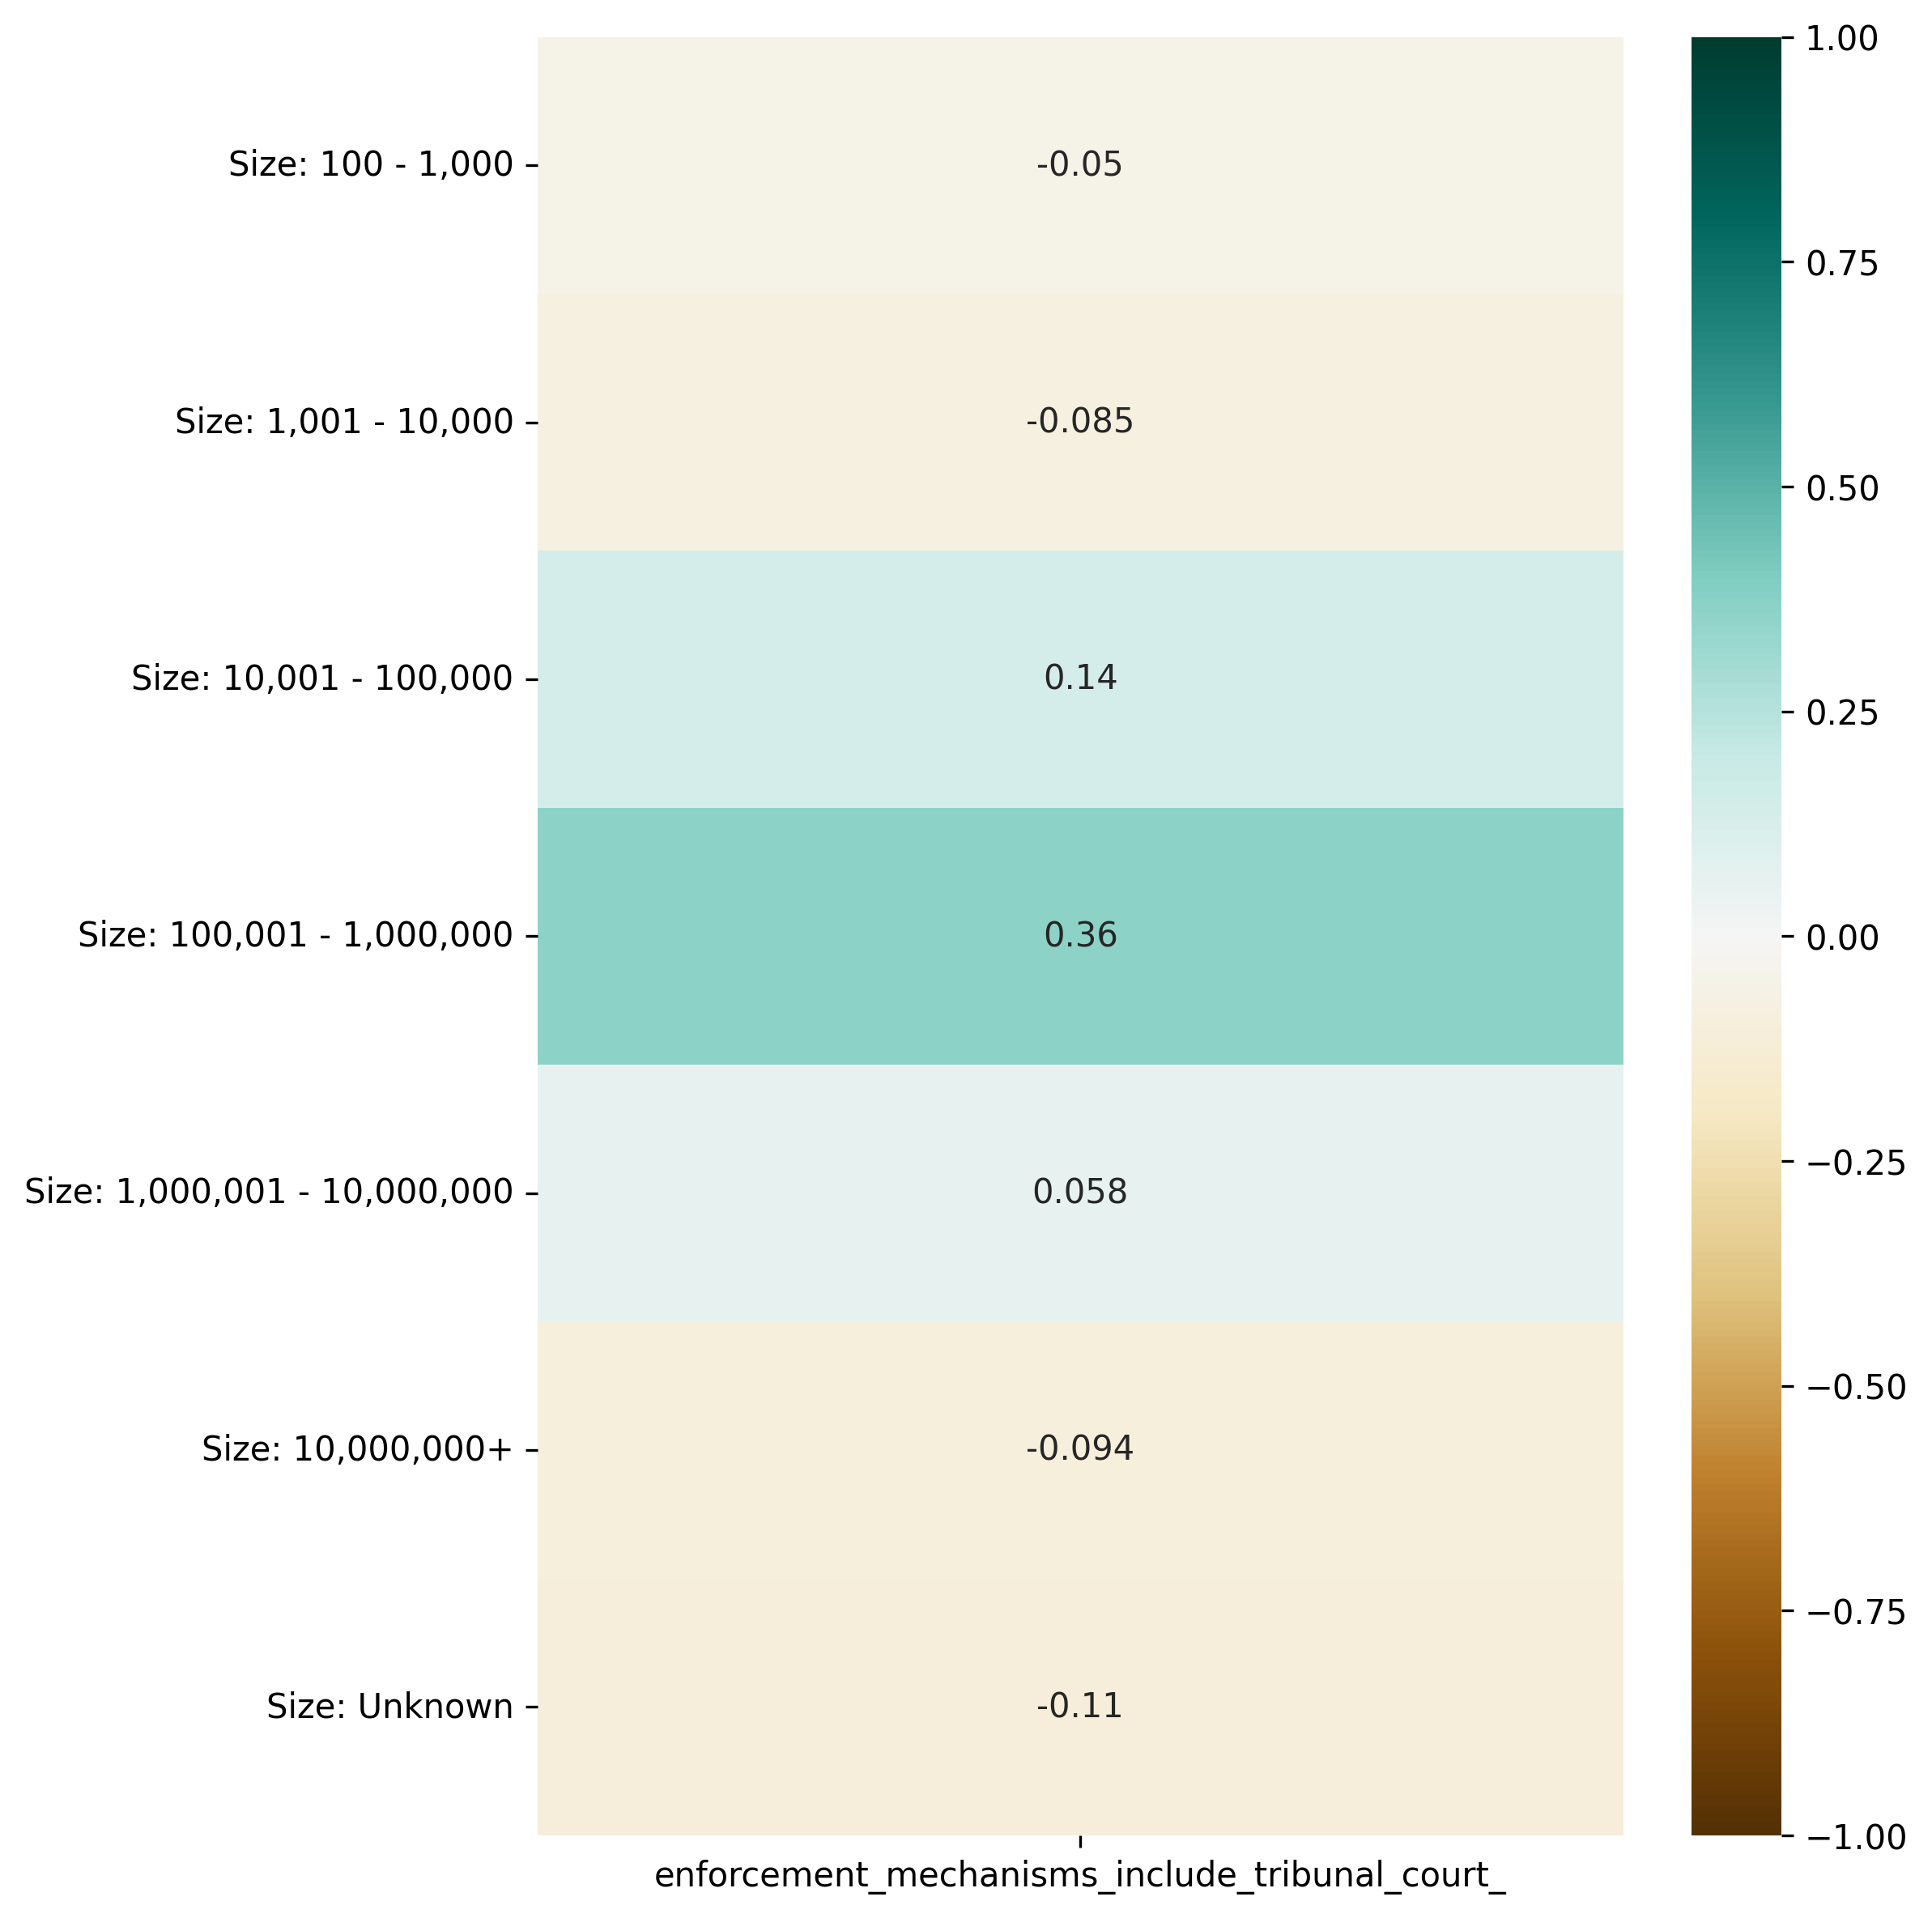

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(
    size_courts_corr, 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../fig-courts/courts_size_corr.png')
plt.show()

## Councils Analysis: Region

In [70]:
region_cols = [col for col in col_list if col.startswith('Region:')]
region_cols

['Region: Africa',
 'Region: Europe',
 'Region: Asia',
 'Region: Middle East',
 'Region: North America',
 'Region: Central America',
 'Region: South America',
 'Region: Oceania']

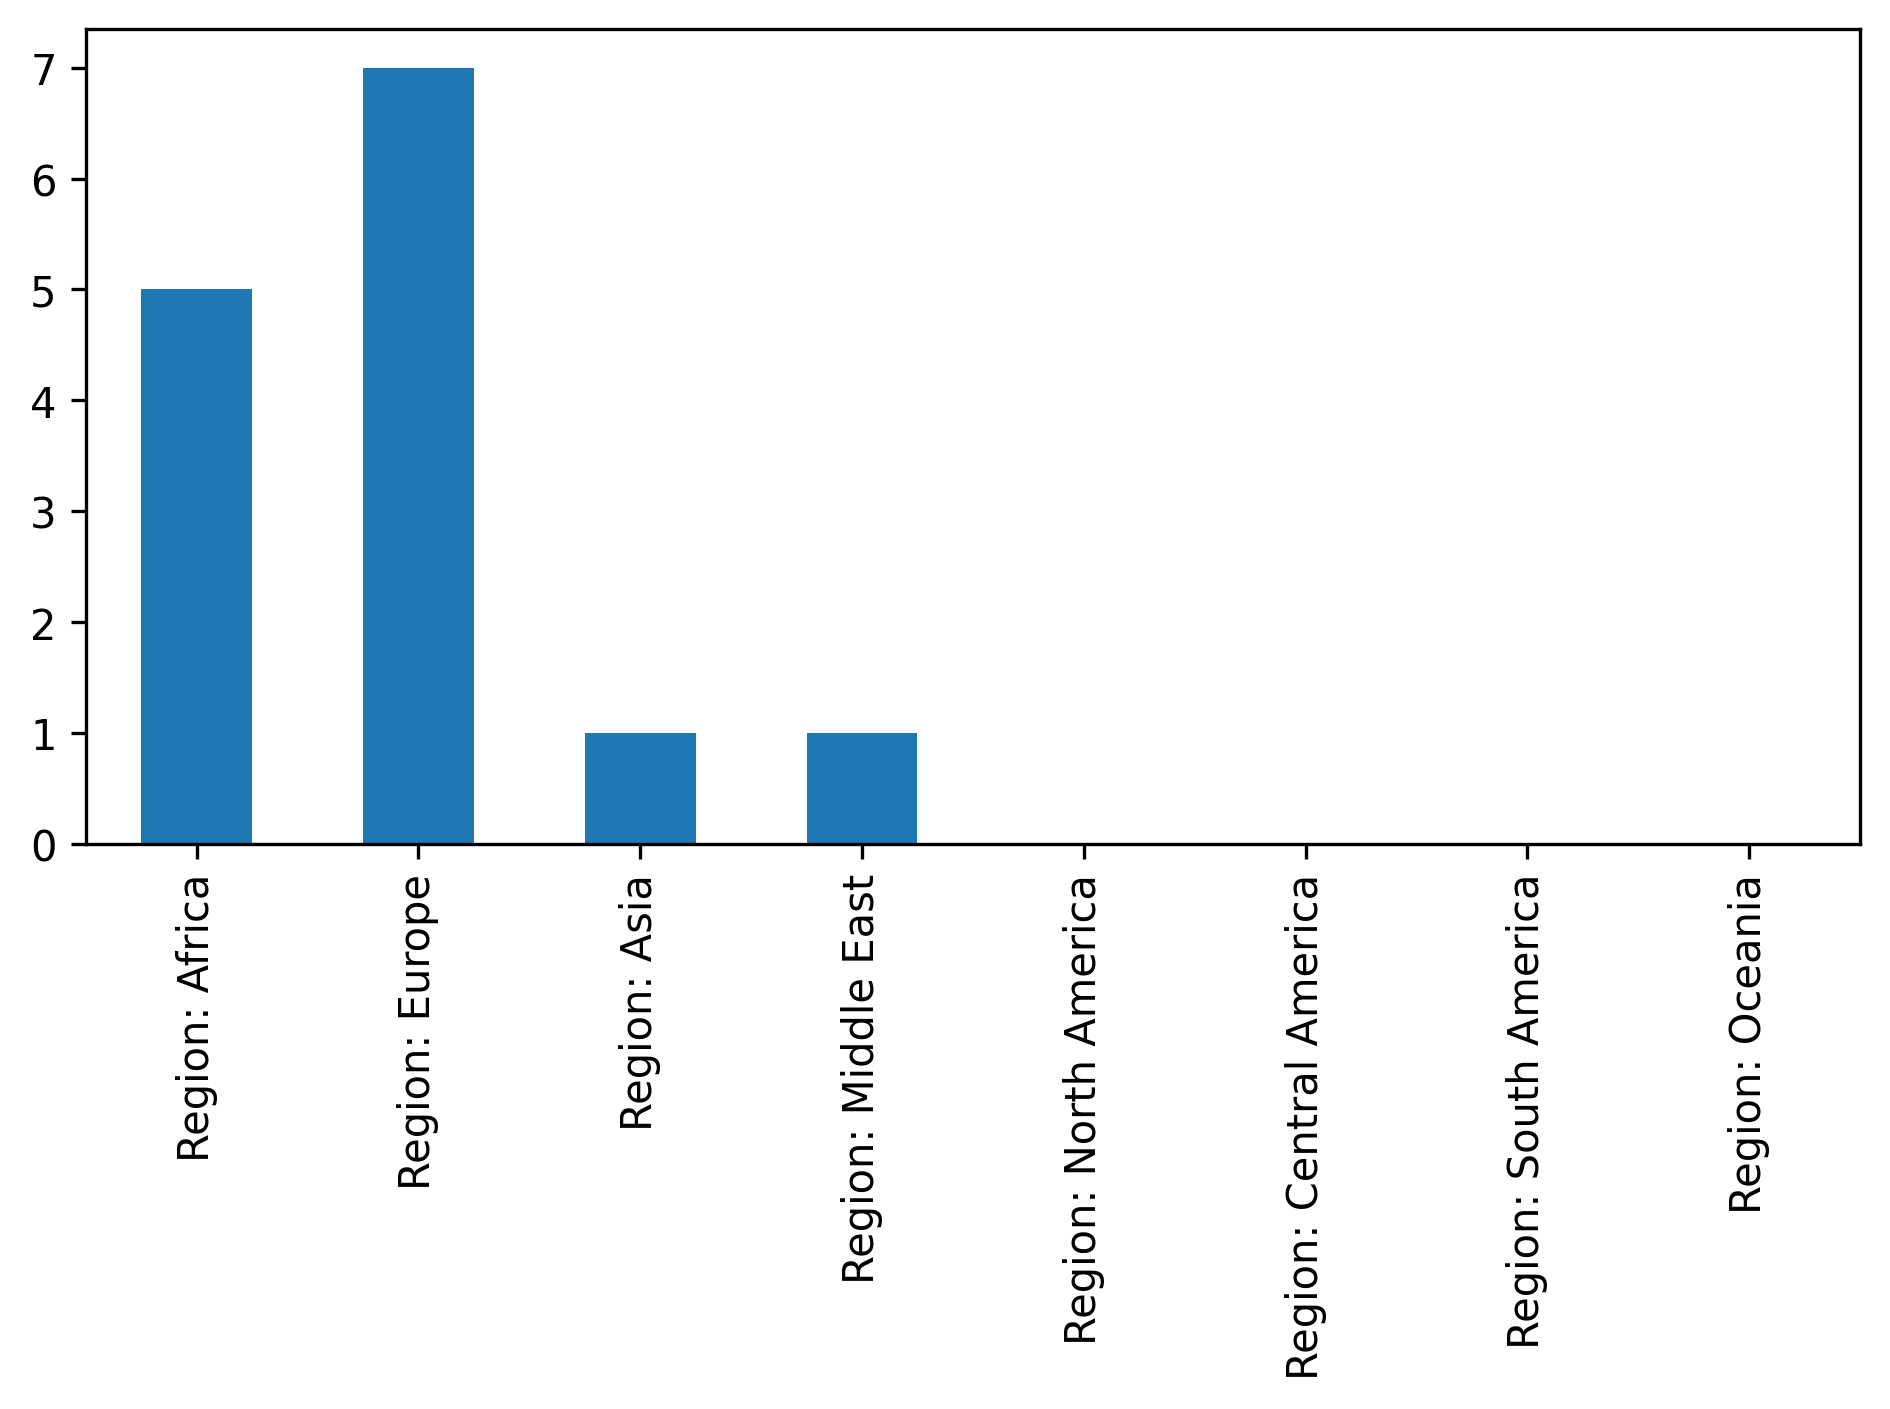

In [73]:
# Region histogram
courts_df[region_cols].sum().plot(kind='bar')

plt.tight_layout()
plt.savefig('../fig-courts/courts_region_histogram.png')
plt.show()

In [74]:
region_courts_corr = courts_corr[courts_corr.index.str.startswith('Region:')]

In [75]:
region_courts_corr

enforcement_mechanisms_include_tribunal_court_
Region: Africa                                                 0.536389
Region: Europe                                                 0.212533
Region: Asia                                                  -0.156059
Region: Middle East                                           -0.081479
Region: North America                                         -0.150399
Region: Central America                                       -0.102051
Region: South America                                         -0.050343
Region: Oceania                                               -0.050343

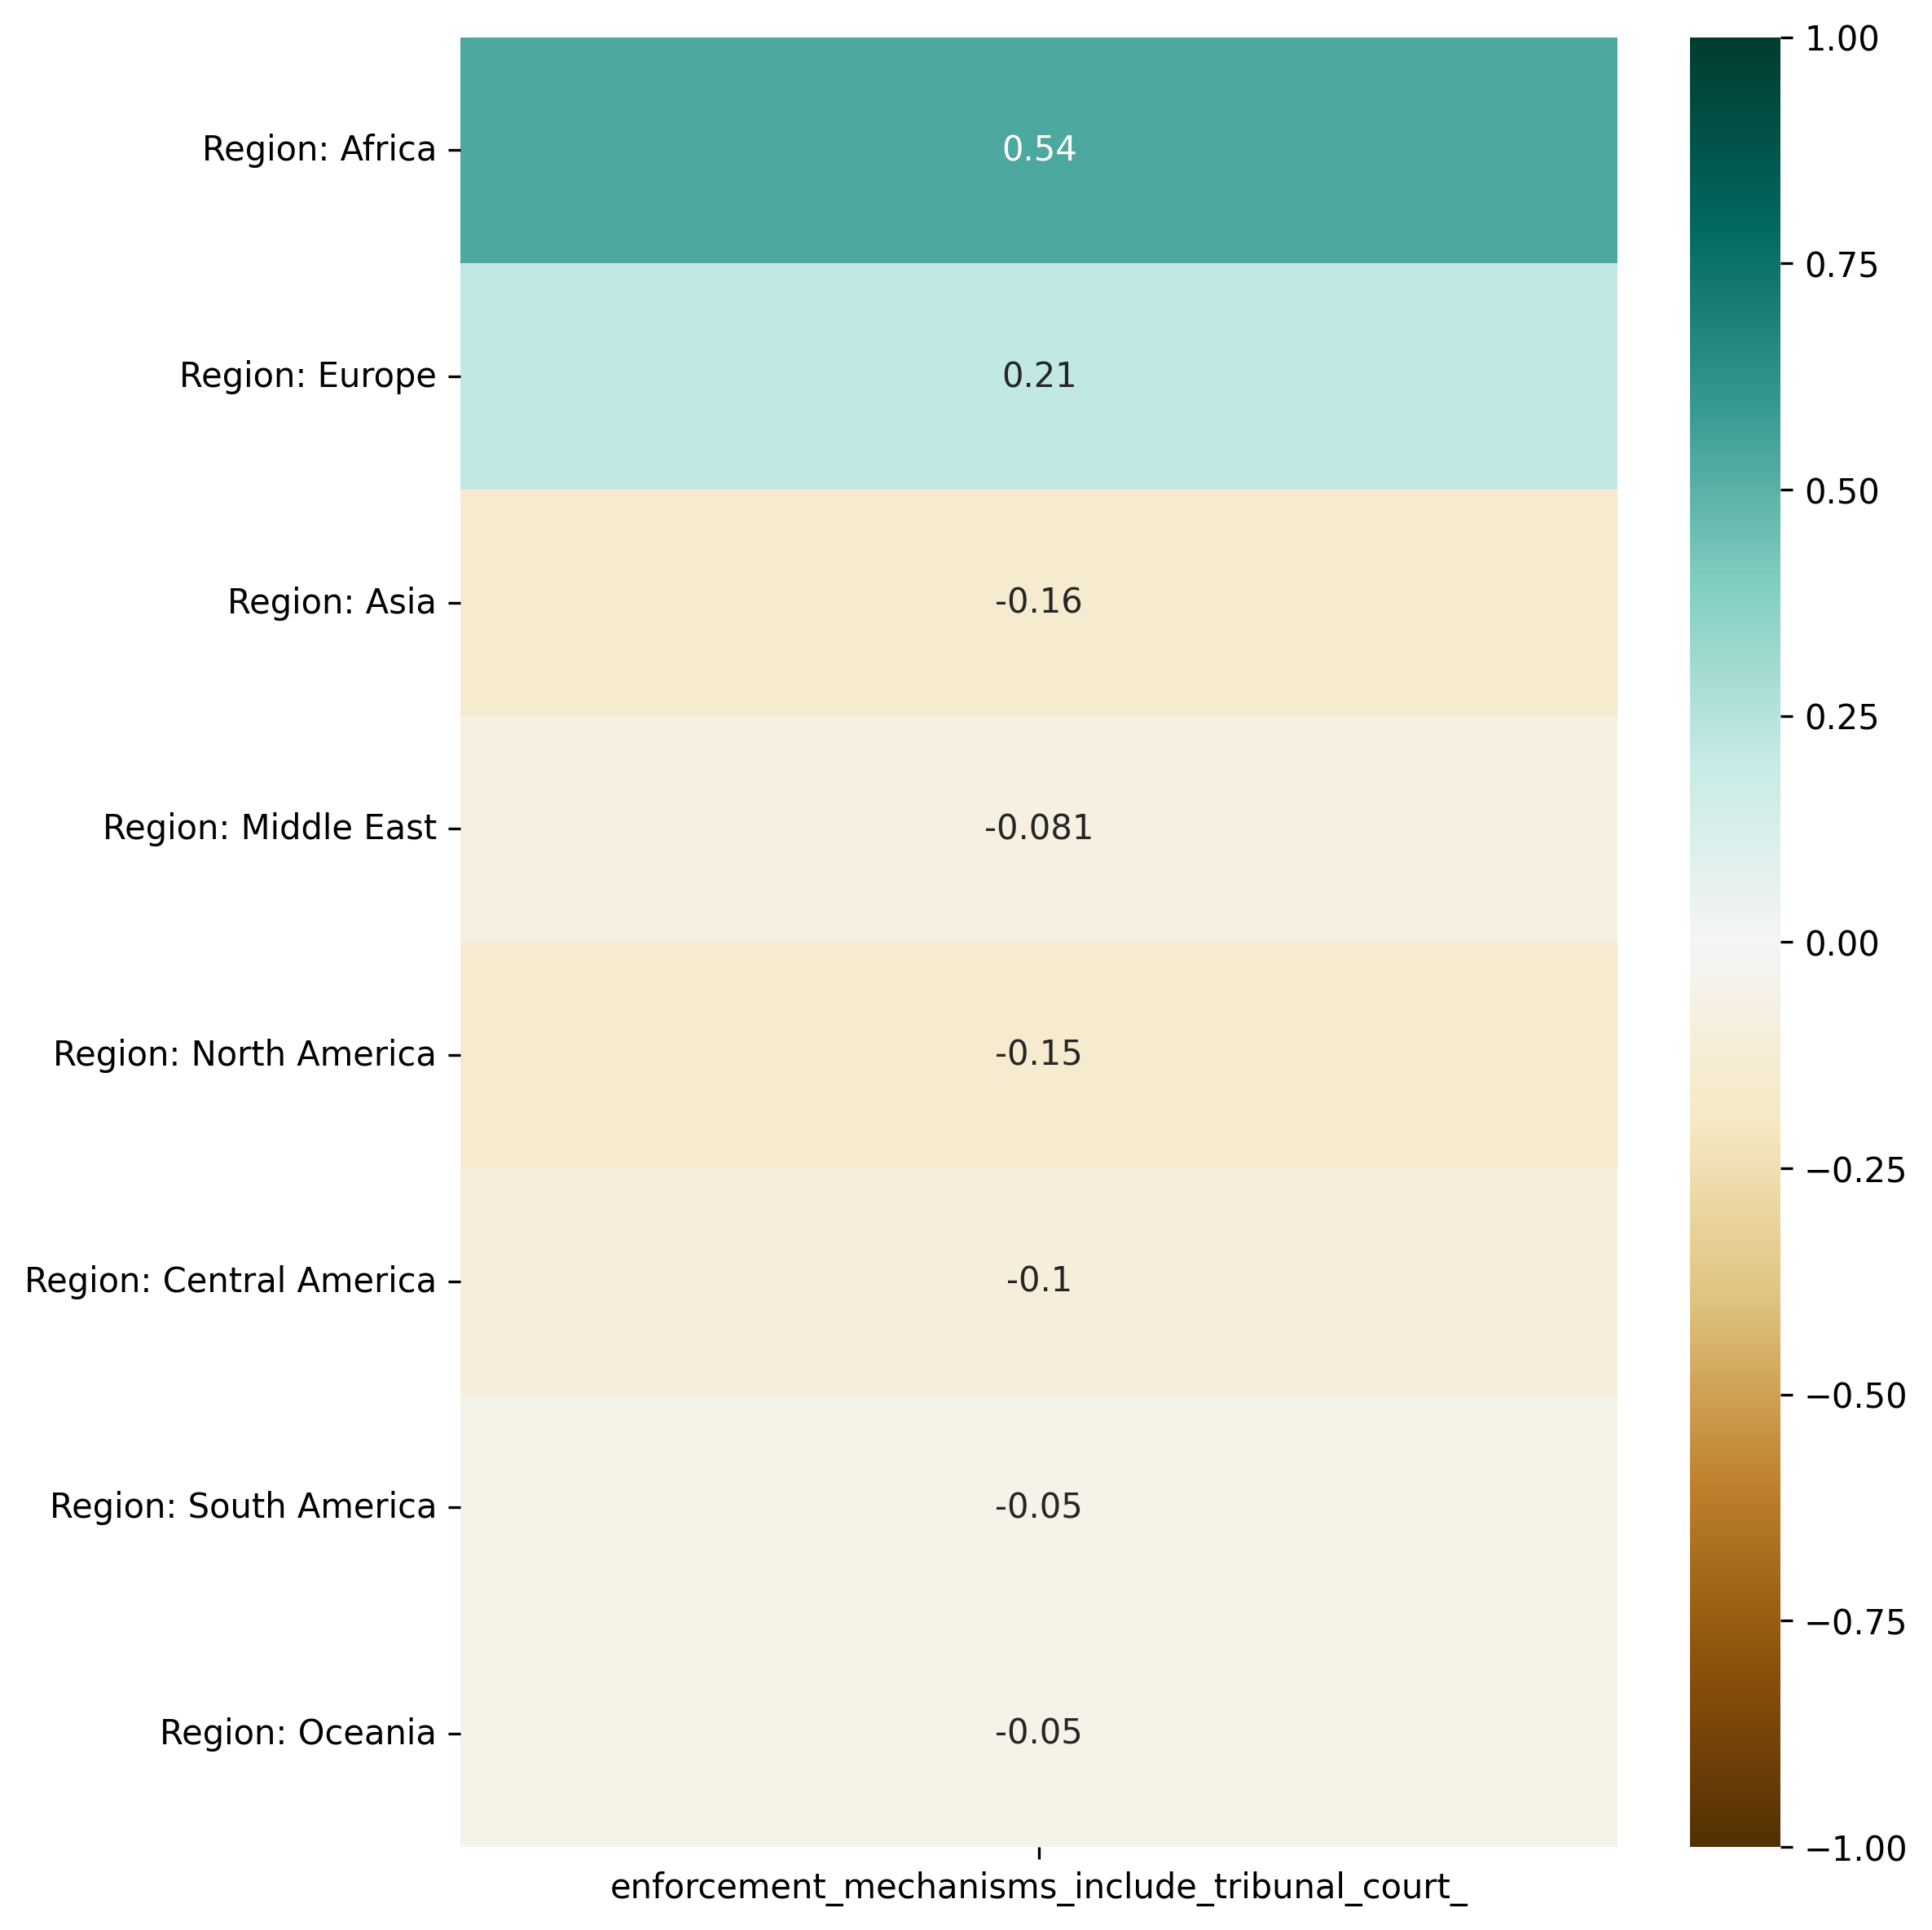

In [76]:
plt.figure(figsize=(8,8))
sns.heatmap(
    region_courts_corr, 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig('../fig-courts/courts_region_corr.png')
plt.show()

### Mapping council regions

In [77]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

worldmap.head()

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_53854/1532259957.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [78]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

worldmap['continent'].value_counts()

Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [79]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])
regions_list = list(gov_df['Region'].unique())

In [80]:
region_map['Region'] = regions_list

region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

region_map

Region                                           geometry
0           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...
1           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...
2             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...
3      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...
4  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...

#### All Councils

In [81]:
courts_region_map = region_map

In [92]:
courts_region_counts = courts_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [93]:
courts_region_counts

Region  Count
0       Europe      7
1       Africa      5
2         Asia      1
3  Middle East      1

In [95]:
# Custom: Add empty regions
missing_regions_df = pd.DataFrame([['Oceania',0],['South America', 0],['Central America', 0],['North America', 0]], columns=['Region', 'Count'])
missing_regions_df

Region  Count
0          Oceania      0
1    South America      0
2  Central America      0
3    North America      0

In [96]:
# Custom: Add empty regions
courts_region_counts = pd.concat([courts_region_counts, missing_regions_df])
courts_region_counts

Region  Count
0           Europe      7
1           Africa      5
2             Asia      1
3      Middle East      1
0          Oceania      0
1    South America      0
2  Central America      0
3    North America      0

In [97]:
all_merged_regions = pd.merge(courts_region_map, courts_region_counts, on='Region')

In [98]:
all_merged_regions

Region                                           geometry  Count
0           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...      5
1           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...      7
2             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...      1
3      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...      1
4  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...      0
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...      0
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...      0
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...      0

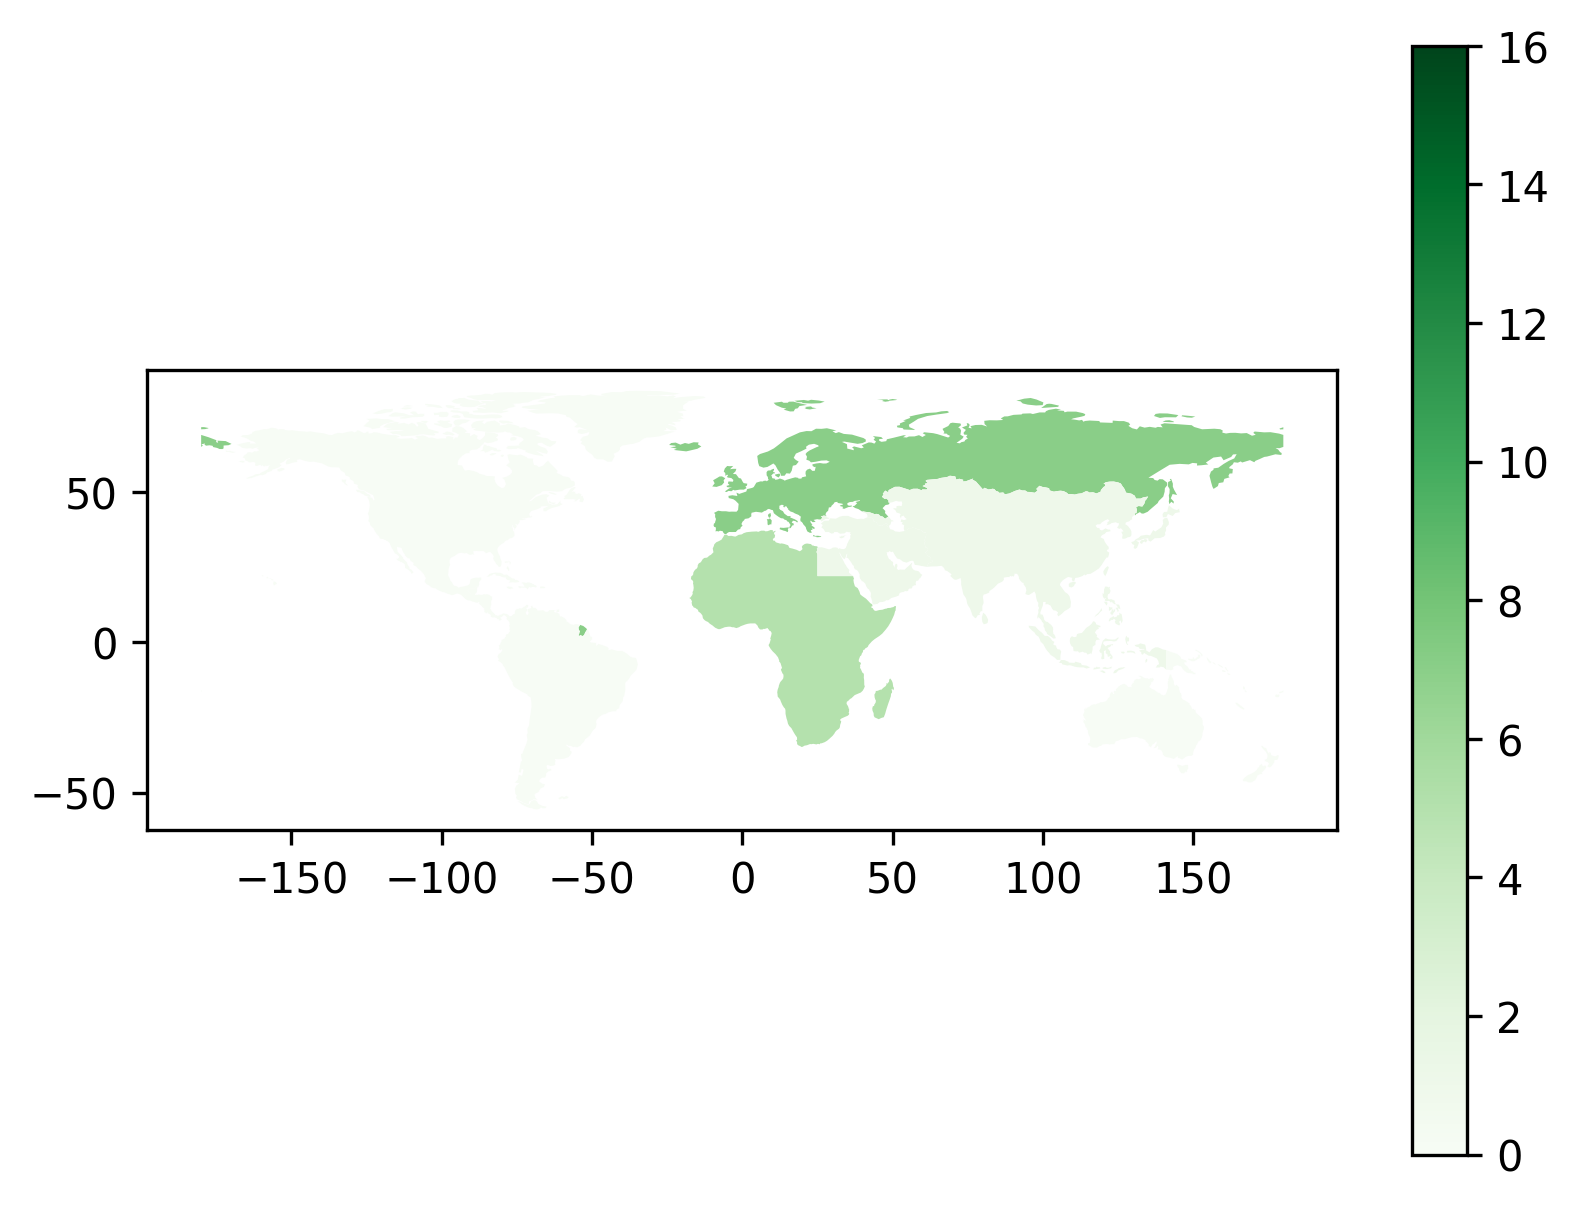

In [99]:
all_merged_regions.plot(
    column='Count', 
    legend=True,
    cmap='Greens',
    vmin=0,
    vmax=16
)

plt.savefig('../fig-courts/map_courts_all.png')
plt.show()

## Courts Analysis: Timeline 

In [101]:
courts_dates_df = courts_df[['Time span: Start', 'Time span: Duration', 'Name'] + court_col]

In [102]:
courts_dates_df

Time span: Start  Time span: Duration                        Name  \
0               1900                  123       !Kung San (Ju/hoansi)   
5              -1920                  120                       Assur   
6               -508                  186   Athens (Classical Period)   
9               -400                  300                    Carthage   
14               900                  300  Communes (Medieval Europe)   
17             -2700                 1700                      Egypt    
18               400                  700       England (Anglo Saxon)   
24              -480                  453           Greek oligarchies   
29               930                  332                    Iceland    
30               900                  660                 Igbo People   
38              1000                  900                       M’zab   
41              1800                  100                 Minangkabau   
60             -1894                  299                      Sippar   
61              1300                  500                 Switzerland   

    enforcement_mechanisms_include_tribunal_court_  
0                                                1  
5                                                1  
6                                                1  
9                                                1  
14                                               1  
17                                               1  
18                                               1  
24                                               1  
29                                               1  
30                                               1  
38                                               1  
41                                               1  
60                                               1  
61                                               1

In [103]:
courts_dates_tuples = [tuple(x) for x in courts_dates_df.to_numpy()]
courts_dates_tuples

[(1900, 123, '!Kung San (Ju/hoansi)', 1),
 (-1920, 120, 'Assur', 1),
 (-508, 186, 'Athens (Classical Period)', 1),
 (-400, 300, 'Carthage', 1),
 (900, 300, 'Communes (Medieval Europe)', 1),
 (-2700, 1700, 'Egypt ', 1),
 (400, 700, 'England (Anglo Saxon)', 1),
 (-480, 453, 'Greek oligarchies', 1),
 (930, 332, 'Iceland ', 1),
 (900, 660, 'Igbo People', 1),
 (1000, 900, 'M’zab', 1),
 (1800, 100, 'Minangkabau', 1),
 (-1894, 299, 'Sippar', 1),
 (1300, 500, 'Switzerland', 1)]

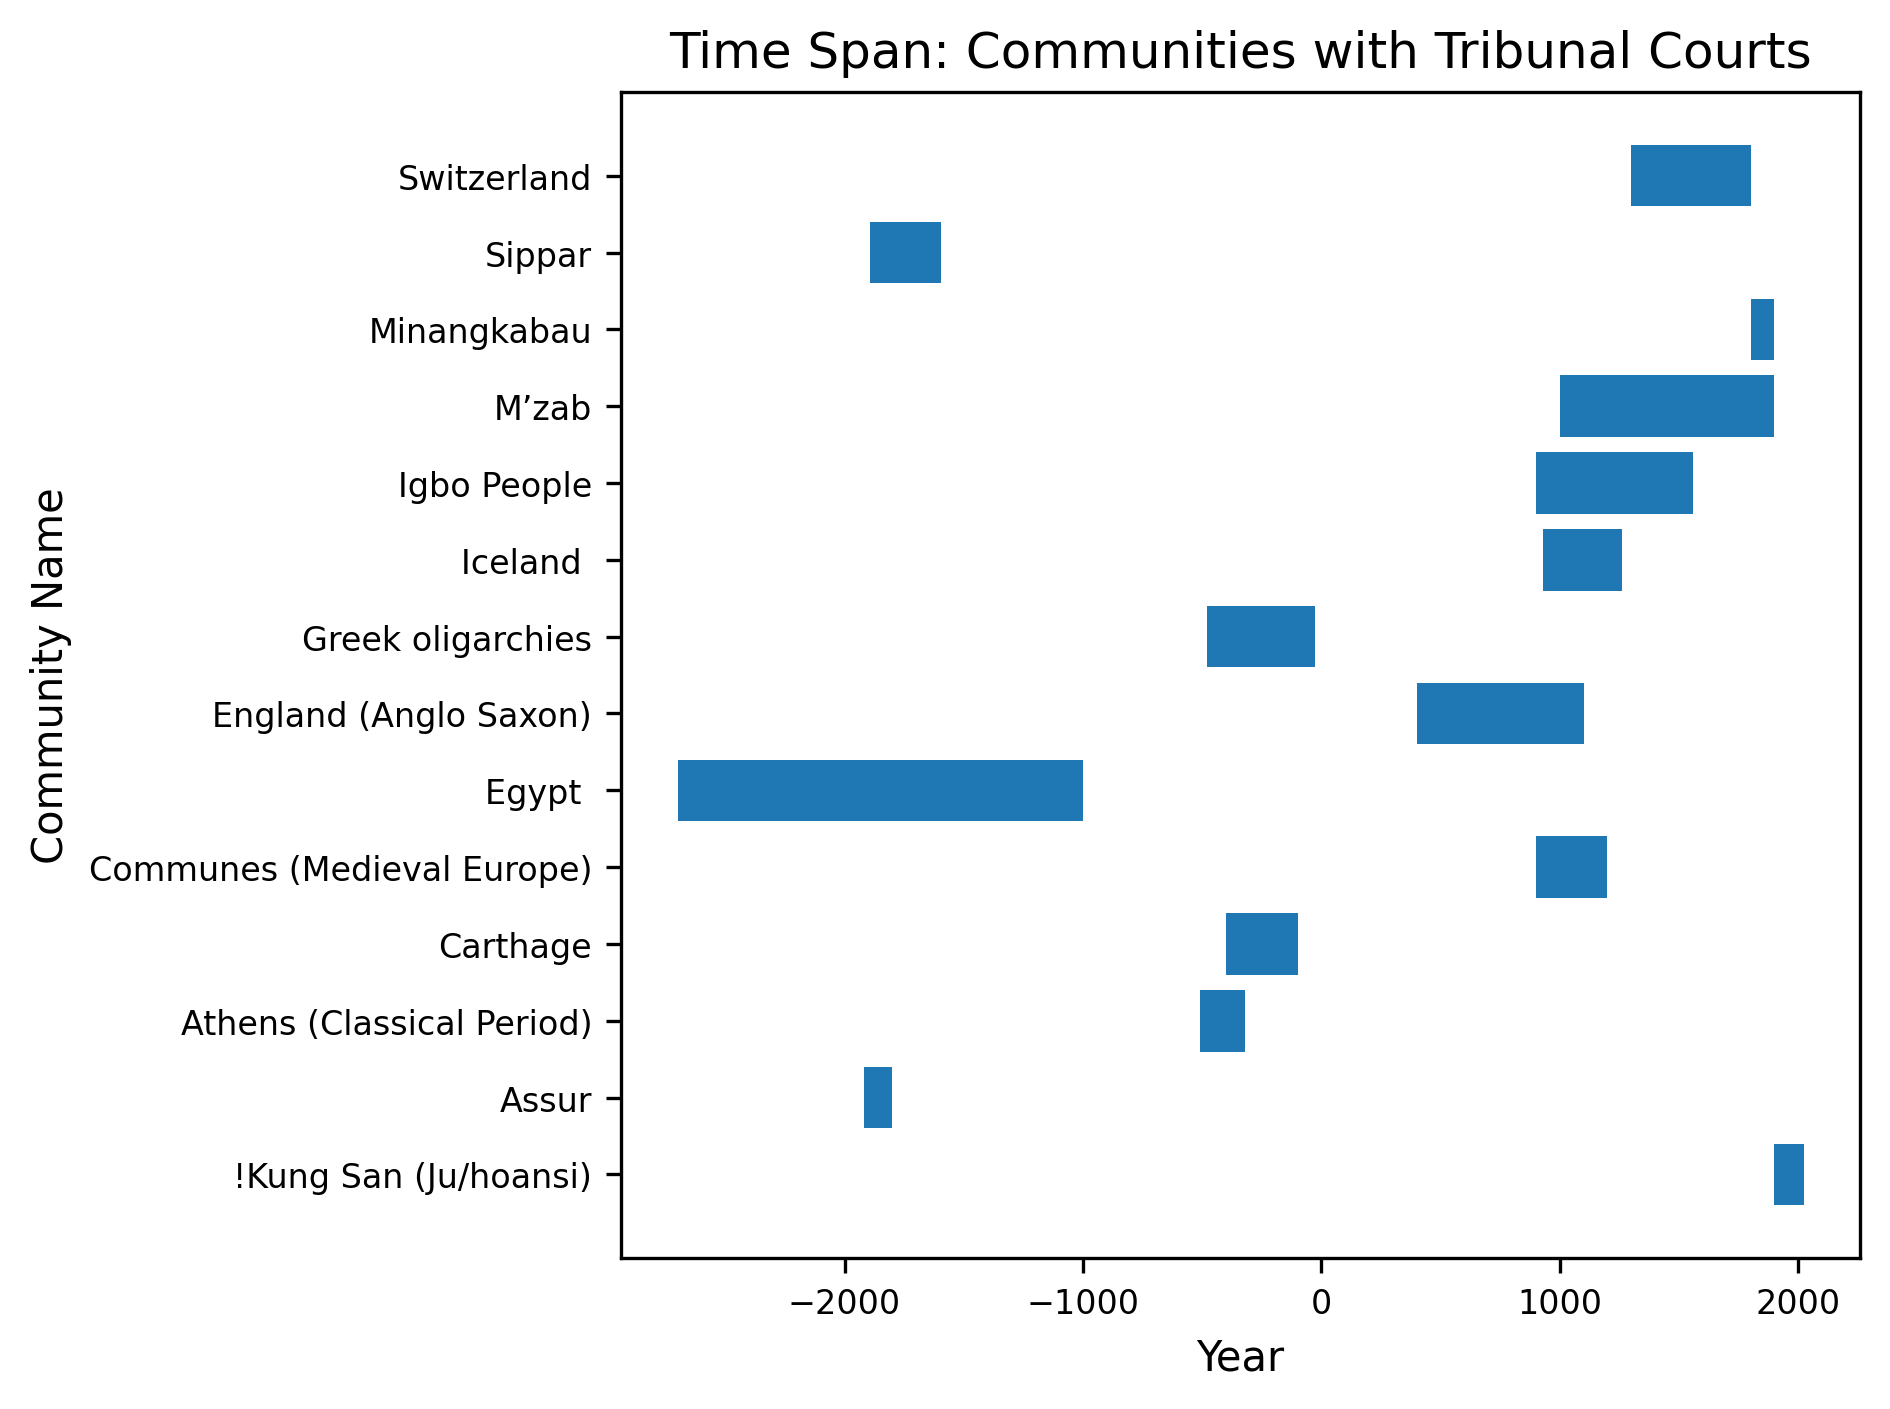

In [107]:
# create figure and plot
fig, ax = plt.subplots()
labels = []
for i, (
    start, 
    duration, 
    label, 
    has_courts,
) in enumerate(courts_dates_tuples):
    # bar_color = 'blue'
    
    labels.append(label)
    ax.broken_barh(
        [(start, duration)], 
        (i-0.4,0.8),
        # color=bar_color
    )
    
# set yticks at the middle of the bars
ax.set_yticks(range(len(courts_dates_tuples)))
ax.set_yticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xlabel('Year')
ax.set_ylabel('Community Name')

plt.title('Time Span: Communities with Tribunal Courts')
# plt.figure(figsize=(80, 80))

plt.tight_layout()
plt.savefig('../fig-courts/timeline_courts.png')
plt.show()